## 서울시에서 공개한 코로나19 발생동향 분석
* http://www.seoul.go.kr/coronaV/coronaStatus.do

In [1]:
# pandas, numpy 라이브러리 로드하기

import pandas as pd
import numpy as np

In [2]:
# file_name 변수에 read_html 로 저장한 파일명을 지정해 줍니다.
# f를 사용해서 불러오면 변수를 쓸 수 있습니다.
file_name = f'seoul-covid19-7_26_.csv'
file_name

'seoul-covid19-7_26_.csv'

* CSV 파일 다운로드 : https://bit.ly/seoul-covid19-csv

In [3]:
# read_csv 로 csv 파일을 불러와 주세요.
df = pd.read_csv('seoul-covid19-7_26_.csv')
df.shape

(1574, 7)

In [4]:
# "연번"을 기준으로 역순으로 정렬합니다.

df = df.sort_values(by = '연번', ascending = False)
df.shape

(1574, 7)

In [5]:
# head 로 미리보기를 합니다.

df.head()

,연번,환자,확진일,거주지,여행력,접촉력,조치사항
0,1574,14172,7.26.,송파구,-,송파구 확진자 접촉,서울의료원
1,1573,14173,7.26.,강동구,미국,해외 접촉 추정,보라매병원
2,1572,14165,7.26.,종로구,-,송파구 확진자 접촉,서울의료원
3,1571,14175,7.26.,관악구,필리핀,해외 접촉 추정,보라매병원
4,1570,14171,7.26.,용산구,이라크,해외 접촉 추정,서울의료원


In [6]:
# tail 로 미리보기를 합니다.

df.tail()

,연번,환자,확진일,거주지,여행력,접촉력,조치사항
1569,5,9,1.31.,성북구,-,#5 접촉,서울의료원(퇴원)
1570,4,7,1.30.,마포구,중국 우한시,해외 접촉,서울의료원(퇴원)
1571,3,6,1.30.,종로구,-,#3 접촉,서울대학교병원(퇴원)
1572,2,5,1.30.,중랑구,중국 우한시,해외 접촉,서울의료원(퇴원)
1573,1,2,1.24.,강서구,중국 우한시,해외 접촉,국립중앙의료원(퇴원)


## 시각화 도구 불러오기

In [7]:
# matplotlib.pyplot 을 통해 한글폰트를 설정합니다.
# plt.style.use 로 "fivethirtyeight" 스타일을 사용해 봅니다.

import matplotlib.pyplot as plt

# 한글폰트 설정하기
plt.rc('font', family = 'Malgun Gothic')
# -(음수)폰트 설정하기
plt.rc('axes', unicode_minus = False)

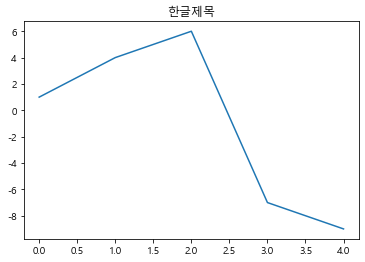

In [8]:
pd.Series([1, 4, 6, -7, -9]).plot(title = '한글제목')

### 시각화 선명하게 설정하기

In [9]:
# retina 디스플레이가 지원되는 환경에서 시각화의 폰트가 좀 더 선명해 보입니다.

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

## 확진일

In [10]:
# 확진일의 빈도수를 봅니다. 어느 날짜에 가장 많이 확진이 되었는지 봅니다.

df['확진일'].value_counts().head(10)

3.10.    46
6.12.    30
6.06.    29
6.05.    27
3.9.     26
5.27.    25
6.11.    25
6.17.    24
3.31.    24
3.29.    22
Name: 확진일, dtype: int64

In [11]:
# "확진일" 컬럼의 데이터가 날짜 형태가 아니라 문자형태 입니다.

df['확진일'].head(1)

0    7.26.
Name: 확진일, dtype: object

In [12]:
# 데이터 타입을 변경해서 날짜형태로 변환합니다.
# 판다스의 to_datetime 을 사용해서 날짜 타입으로 변경할 수 있습니다.
# 연도가 없기 때문에 2020년을 날짜에 추가하고 "-" 문자로 날짜를 연결해 줍니다.


"2020." + df["확진일"].str.replace(".", "-")
"2020-" + df["확진일"].str.replace(".", "-")
df["확진일자"] = pd.to_datetime('2020-' + df['확진일'].str.replace('.', '-'))
df.head()

,연번,환자,확진일,거주지,여행력,접촉력,조치사항,확진일자
0,1574,14172,7.26.,송파구,-,송파구 확진자 접촉,서울의료원,2020-07-26
1,1573,14173,7.26.,강동구,미국,해외 접촉 추정,보라매병원,2020-07-26
2,1572,14165,7.26.,종로구,-,송파구 확진자 접촉,서울의료원,2020-07-26
3,1571,14175,7.26.,관악구,필리핀,해외 접촉 추정,보라매병원,2020-07-26
4,1570,14171,7.26.,용산구,이라크,해외 접촉 추정,서울의료원,2020-07-26


In [13]:
# 월만 추출합니다.

df['월'] = df["확진일자"].dt.month
df.head(1)

,연번,환자,확진일,거주지,여행력,접촉력,조치사항,확진일자,월
0,1574,14172,7.26.,송파구,-,송파구 확진자 접촉,서울의료원,2020-07-26,7


In [14]:
# 해당 연도의 몇번째 "주"인지 추출합니다.

df['주'] = df["확진일자"].dt.week
df.head()

,연번,환자,확진일,거주지,여행력,접촉력,조치사항,확진일자,월,주
0,1574,14172,7.26.,송파구,-,송파구 확진자 접촉,서울의료원,2020-07-26,7,30
1,1573,14173,7.26.,강동구,미국,해외 접촉 추정,보라매병원,2020-07-26,7,30
2,1572,14165,7.26.,종로구,-,송파구 확진자 접촉,서울의료원,2020-07-26,7,30
3,1571,14175,7.26.,관악구,필리핀,해외 접촉 추정,보라매병원,2020-07-26,7,30
4,1570,14171,7.26.,용산구,이라크,해외 접촉 추정,서울의료원,2020-07-26,7,30


### 선그래프 그리기
[Visualization — pandas documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html)

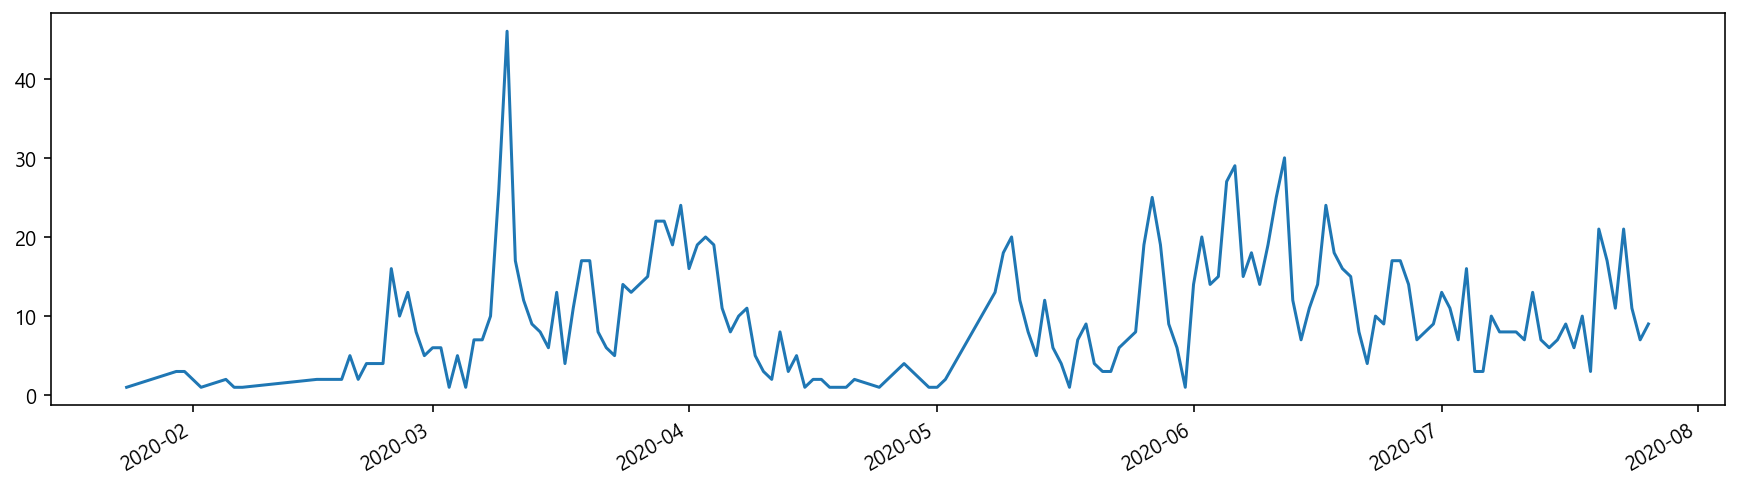

In [15]:
# 확진일자로 선그래프를 그립니다.

df["확진일자"].value_counts().plot(figsize = (15, 4))

### 선그래프에 값 표시하기

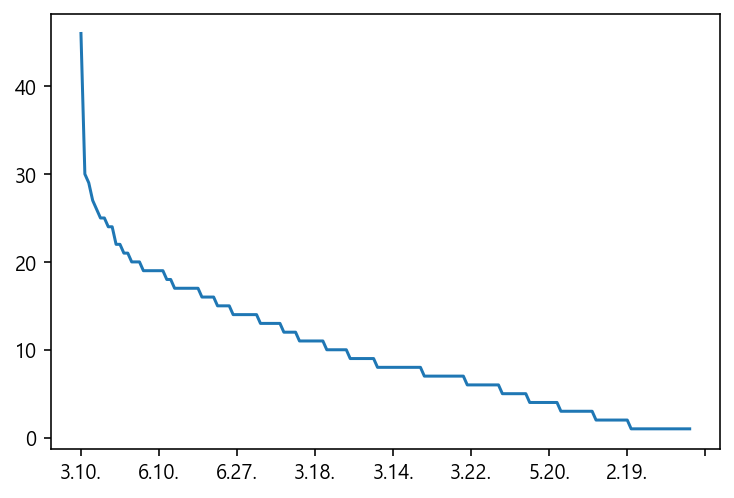

In [16]:
# 일자별 확진자수를 선그래프로 그립니다.
# 연도는 모두 2020년이기 때문에 월일만 표기되도록 슬라이싱을 사용해 "월일" 컬럼을 만듭니다.

df["확진일"].value_counts().plot() # datetime 형태가 아니기때문에 plot이 제대로 그려지지않습니다.

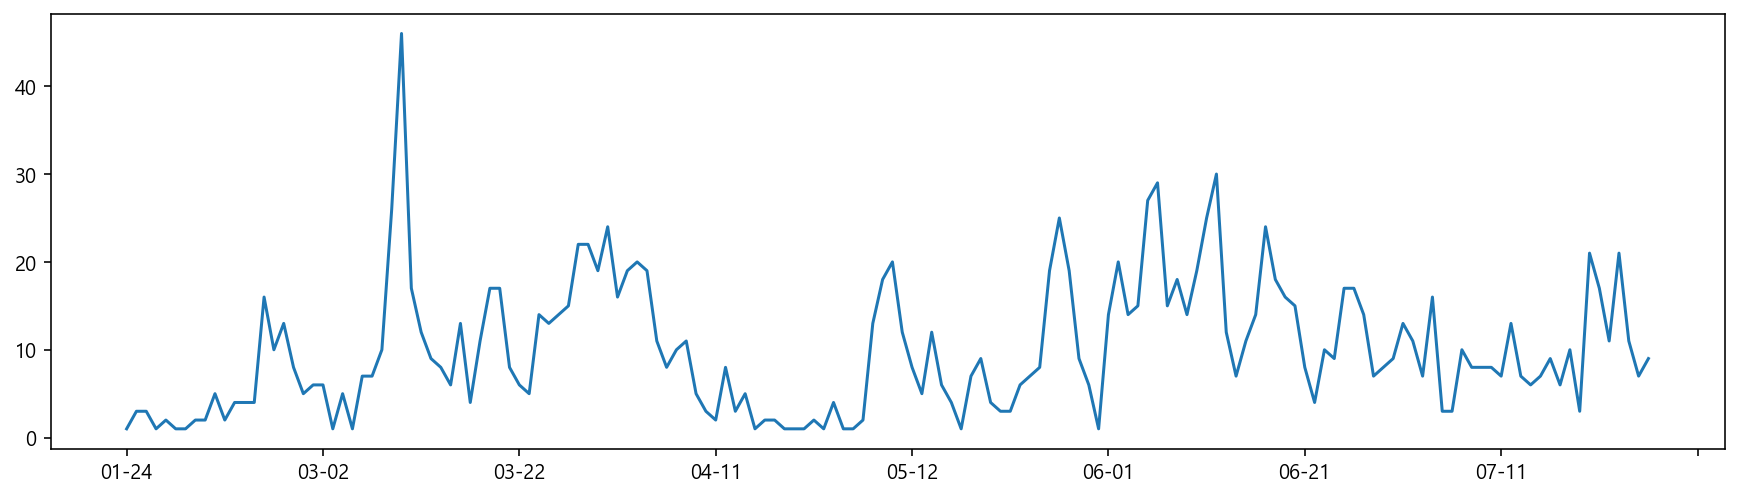

In [17]:
df["월일"] = df["확진일자"].astype(str).map(lambda x:x[-5:])
df["월일"].value_counts().sort_index().plot(figsize = (15, 4))

# 선그래프는 연속형 숫자형 그래프를 그릴때 유용합니다.

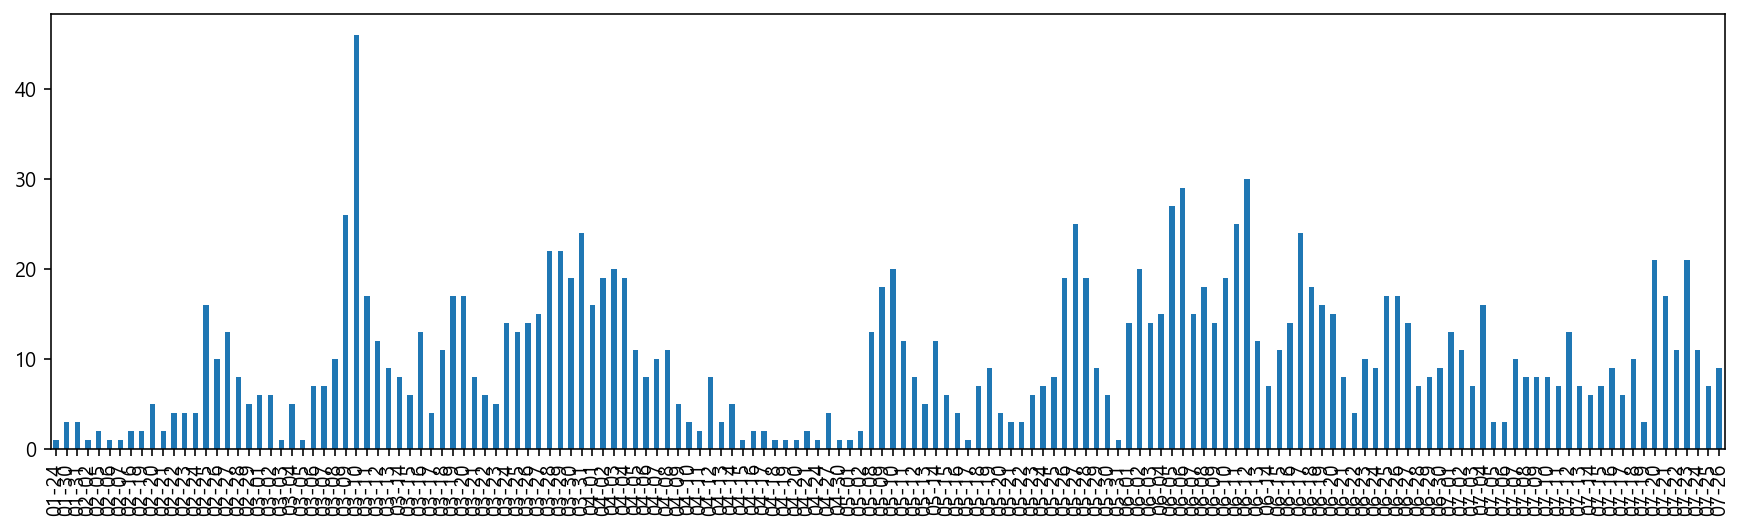

In [18]:
day_count = df["월일"].value_counts().sort_index()
day_count.plot.bar(figsize = (15, 4))

# 막대그래프는 빈도수 표시 및 범주형 데이터를 다룰때 유용합니다. x축에 모든 숫자값이 표시됩니다.
# 모든 x축값이 범주형값이다라는 가정하에 모든값이 표시됩니다.

### 확진자가 가장 많이 나온 날

In [19]:
# describe 를 통해 일자별 확진자수를 describe를 통해 요약해 봅니다.

df["월일"].describe()

count      1574
unique      156
top       03-10
freq         46
Name: 월일, dtype: object

In [20]:
# 확진자가 가장 많았던 날을 찾습니다.

day_count.describe()

count    156.000000
mean      10.089744
std        7.479324
min        1.000000
25%        4.000000
50%        8.000000
75%       14.250000
max       46.000000
Name: 월일, dtype: float64

In [21]:
# 확진자가 가장 많았던 날의 발생이력을 찾습니다.

df[df["월일"] == "03-10"]

,연번,환자,확진일,거주지,여행력,접촉력,조치사항,확진일자,월,주,월일
1372,202,7567,3.10.,노원구,-,콜센터직원 접촉,서울의료원(퇴원),2020-03-10,3,11,03-10
1373,201,7711,3.10.,노원구,-,콜센터직원 접촉,서울의료원(퇴원),2020-03-10,3,11,03-10
1374,200,7555,3.10.,구로구,-,구로구 콜센터 관련,서남병원(퇴원),2020-03-10,3,11,03-10
1375,199,7725,3.10.,양천구,-,구로구 콜센터 관련,서남병원(퇴원),2020-03-10,3,11,03-10
1376,198,7539,3.10.,양천구,-,콜센터직원 접촉,서남병원(퇴원),2020-03-10,3,11,03-10
1377,197,7524,3.10.,양천구,-,콜센터직원 접촉,서울의료원(퇴원),2020-03-10,3,11,03-10
1378,196,7619,3.10.,양천구,-,콜센터직원 접촉,서울의료원(퇴원),2020-03-10,3,11,03-10
1379,195,7795,3.10.,관악구,-,구로구 콜센터 관련,서남병원(퇴원),2020-03-10,3,11,03-10
1380,194,7787,3.10.,관악구,-,콜센터직원 접촉,서남병원(퇴원),2020-03-10,3,11,03-10
1381,193,7826,3.10.,관악구,-,콜센터직원 접촉,서남병원(퇴원),2020-03-10,3,11,03-10


### 막대그래프 그리기

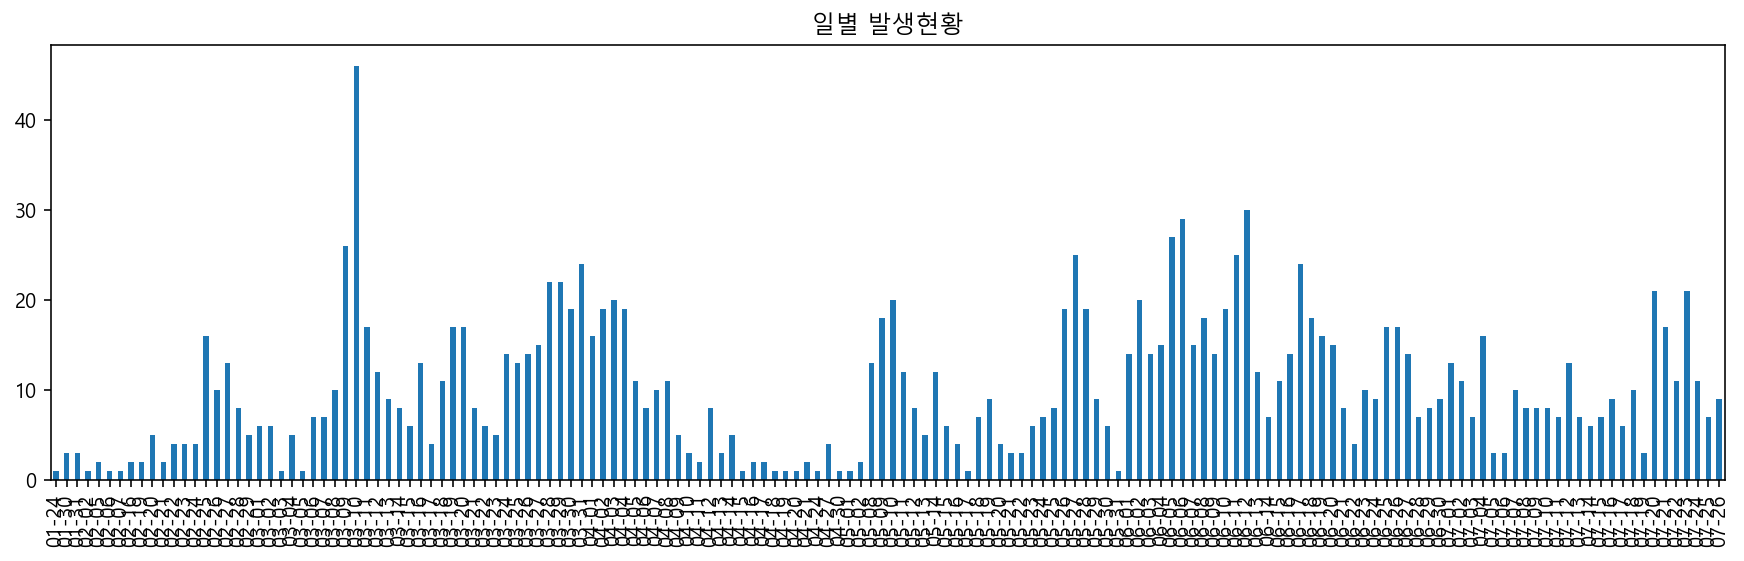

In [22]:
# 선그래프로 그렸던 그래프를 막대그래프로 그립니다.

day_count.plot.bar(figsize = (15, 4), title = "일별 발생현황")

### 최근 데이터만 슬라이싱으로 나눠 그리기

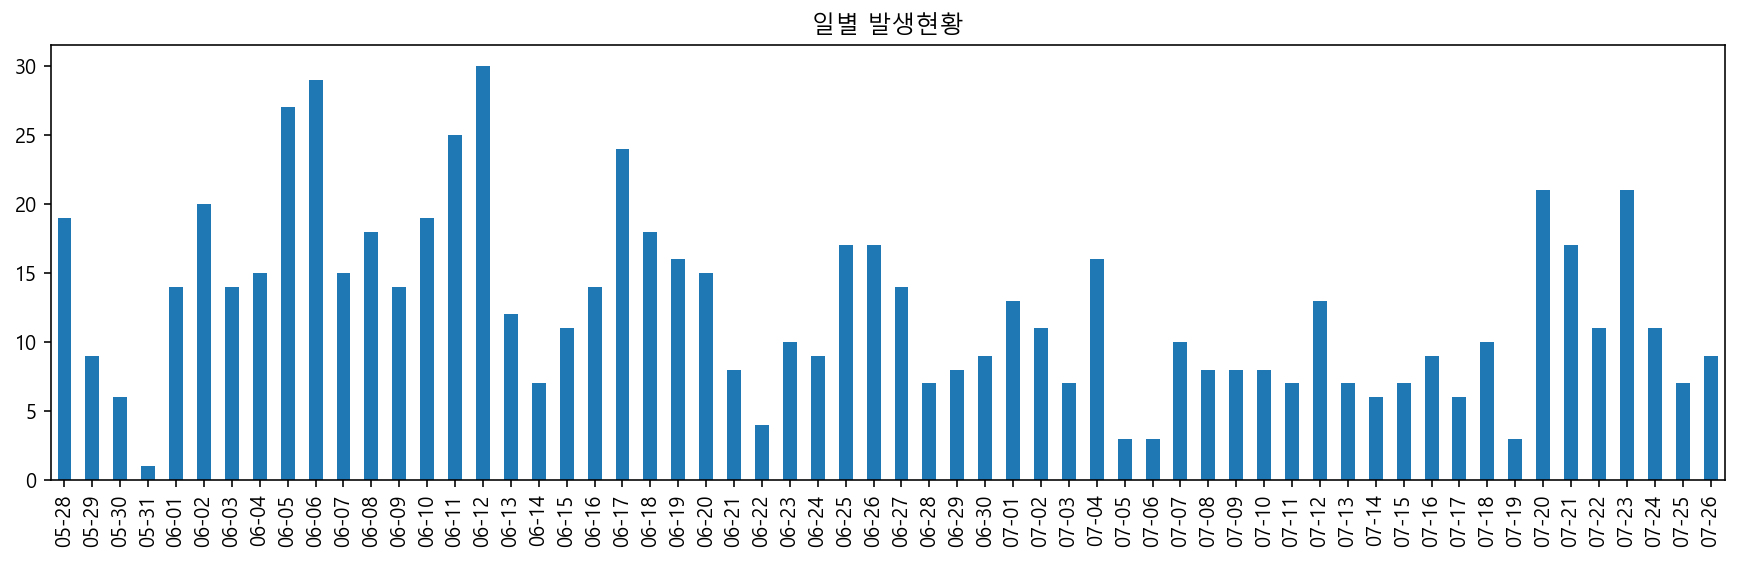

In [23]:
# 슬라이싱을 통해 최근 데이터만 그립니다.

day_count[-60:].plot.bar(figsize = (15, 4), title = "일별 발생현황")

### 월별 확진자 수 그리기

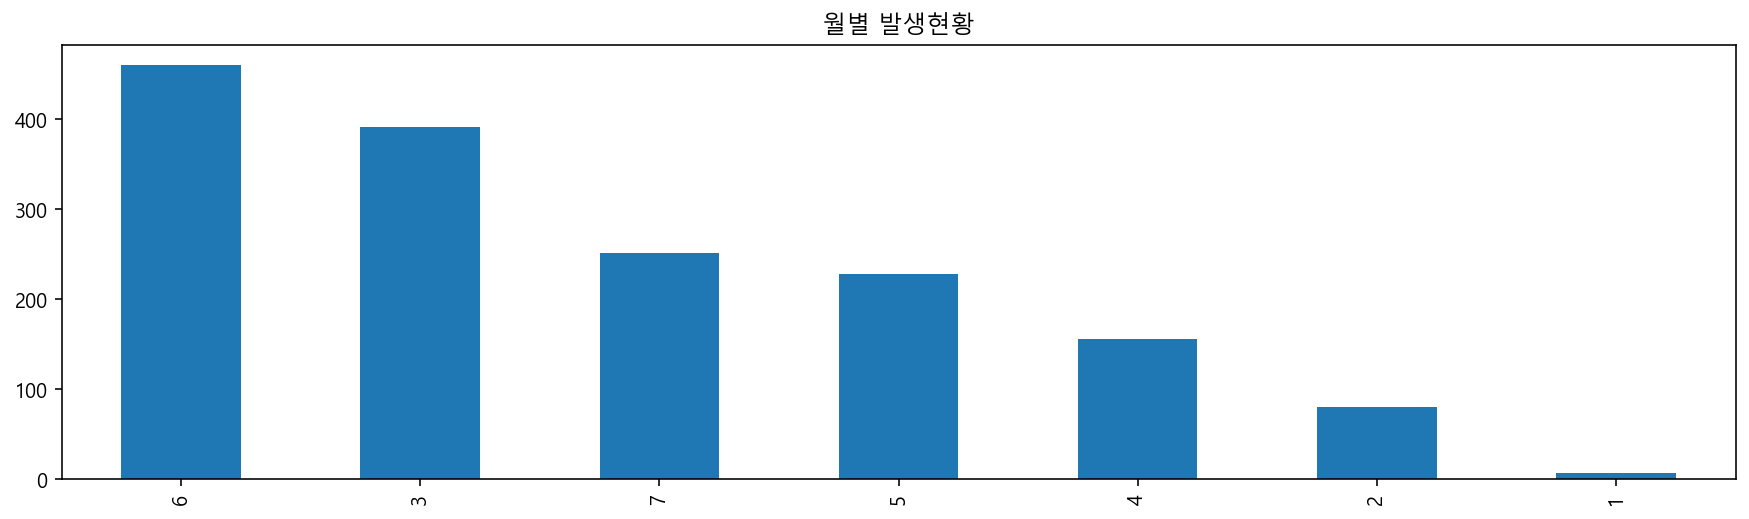

In [24]:
# 월별 확진자수에 대한 빈도수를 구해서 시각화 합니다.
# value_counts는 series에만 사용 가능합니다.

df["월"].value_counts().plot.bar(figsize = (15, 4), title = "월별 발생현황")

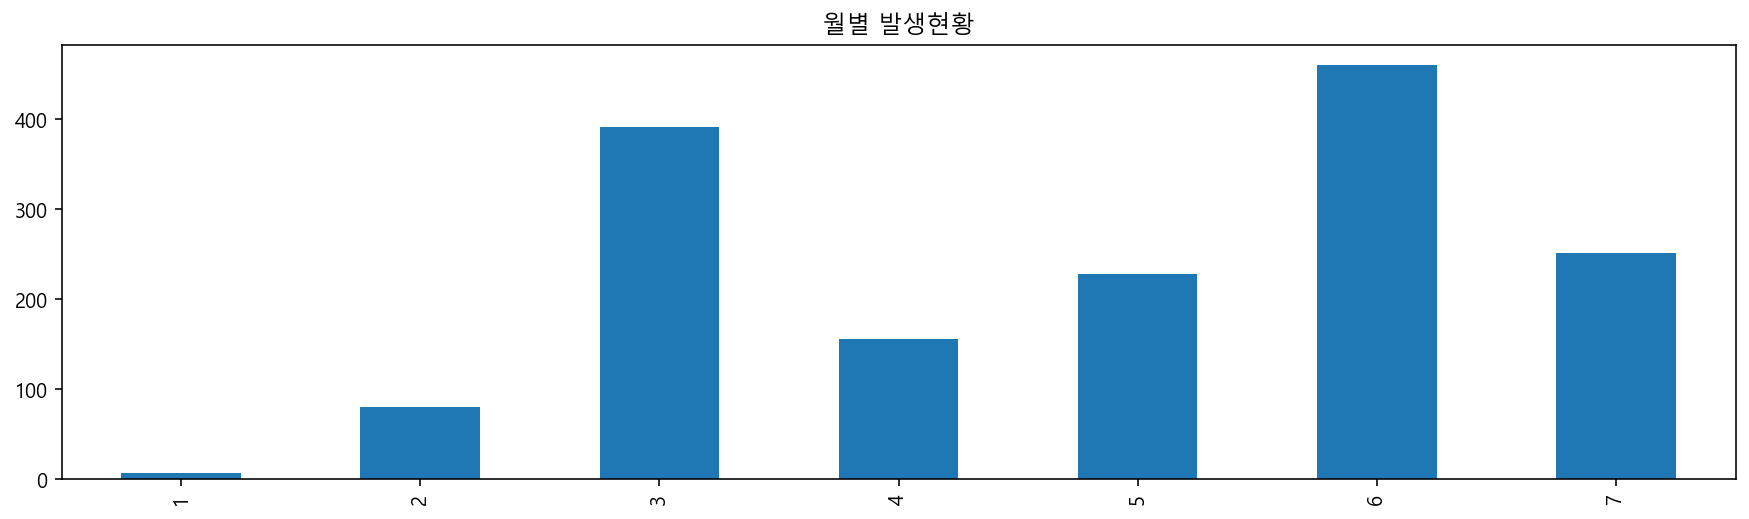

In [25]:
df["월"].value_counts().sort_index().plot.bar(figsize = (15, 4), title = "월별 발생현황")

### 주단위 확진자수 그리기

In [26]:
# 주별로 빈도수를 구합니다.

df["주"].value_counts().sort_index()


4       1
5       7
6       4
7       2
8      17
9      62
10     37
11    124
12     76
13    105
14    128
15     47
16     15
17      4
18      8
19     51
20     48
21     39
22     87
23    134
24    125
25    106
26     78
27     67
28     57
29     48
30     97
Name: 주, dtype: int64

In [27]:
week_count = df["주"].value_counts().sort_index()
week_count_median = week_count.median()
week_count_median

51.0

In [28]:
week_count_mean = week_count.mean()
week_count_mean

58.2962962962963

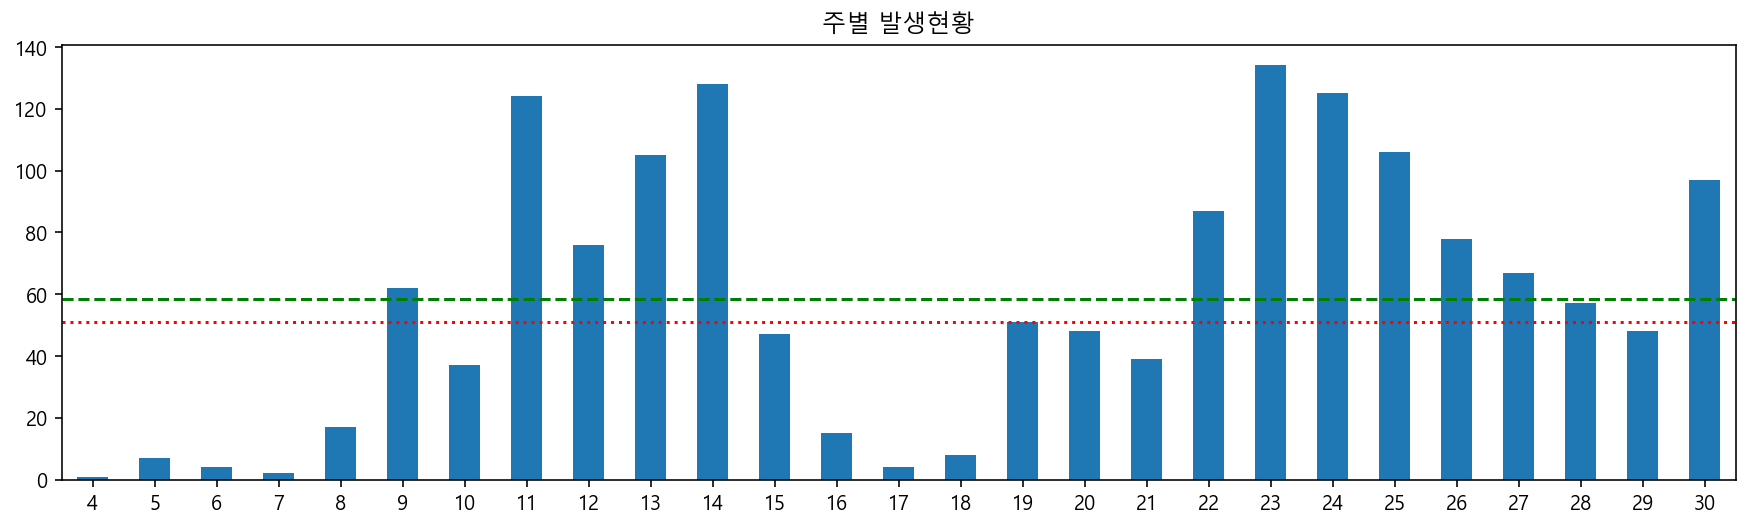

In [29]:
# 주단위 빈도수 막대그래프로 그리기
g = df["주"].value_counts().sort_index().plot.bar(figsize = (15, 4), title = "주별 발생현황", rot = 0)
# rot = 0 은 글자를 바르게 표시합니다.
# 그래프를 변수에 할당하게 되면 쓸데없는 문구가 표현되지 않습니다.
plt.axhline(week_count_median, color = "r", linestyle = ":")
plt.axhline(week_count_mean, color = "g", linestyle = "--")

### 월-주 함께 그리기

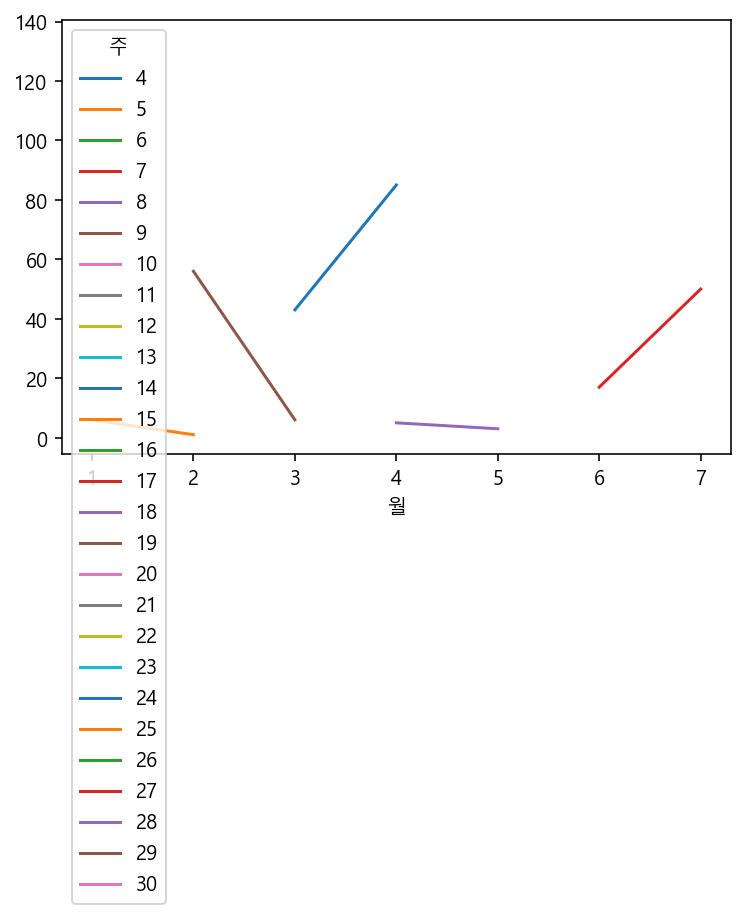

In [30]:
# groupby 를 통해 "월", "주" 로 그룹화 하여 빈도수를 계산합니다.

month_week_count = df.groupby(["월", "주"])["연번"].count().unstack()
month_week_count.plot()

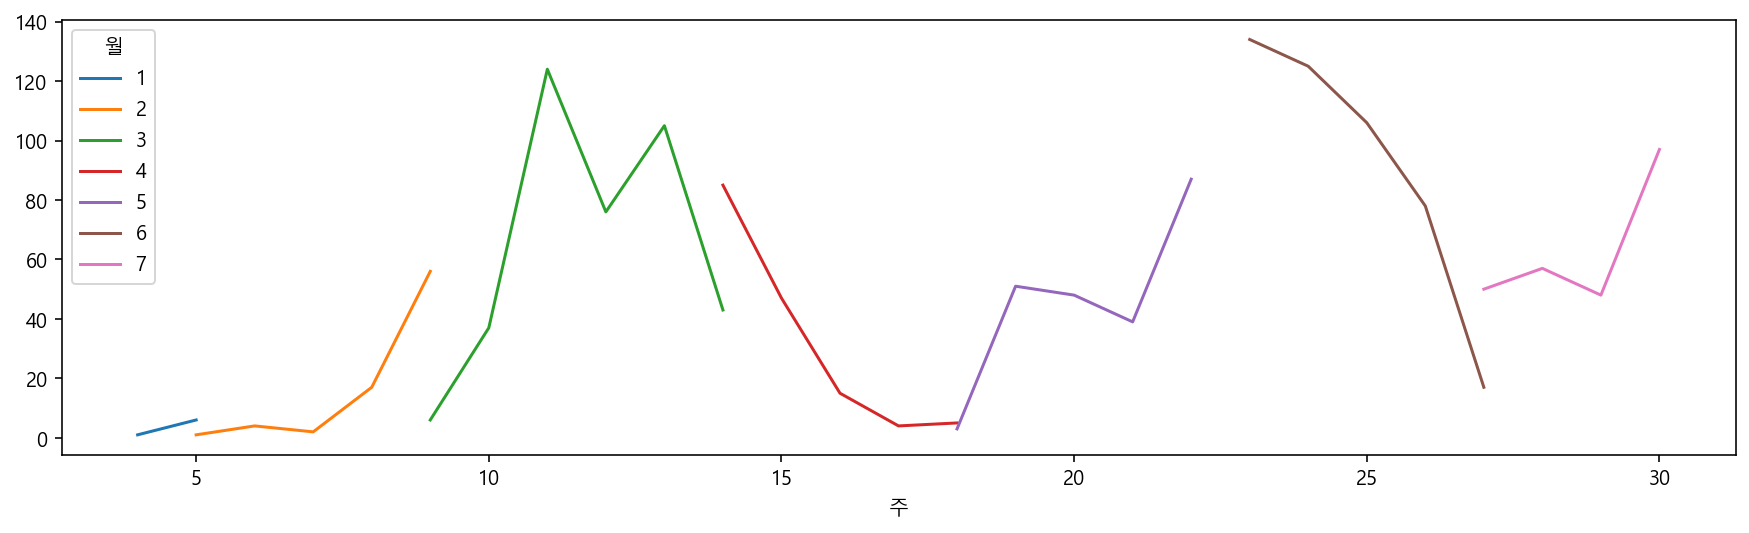

In [31]:
# 월-주 를 함께 그래프에 표현하기


month_week_count.T  # 월과 주를 위치 바꾸기
month_week_count.T.plot(figsize = (15, 4))

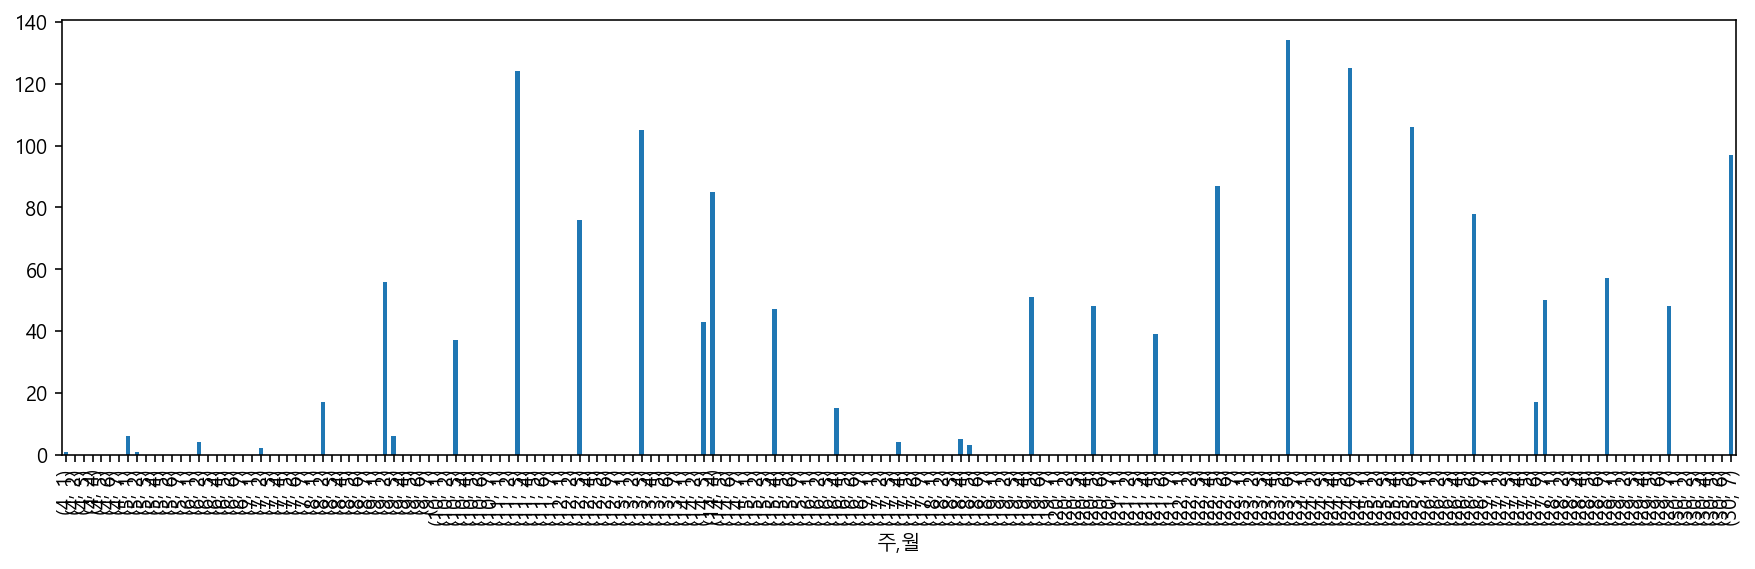

In [32]:
month_week_count.unstack().T.plot.bar(figsize = (15, 4))

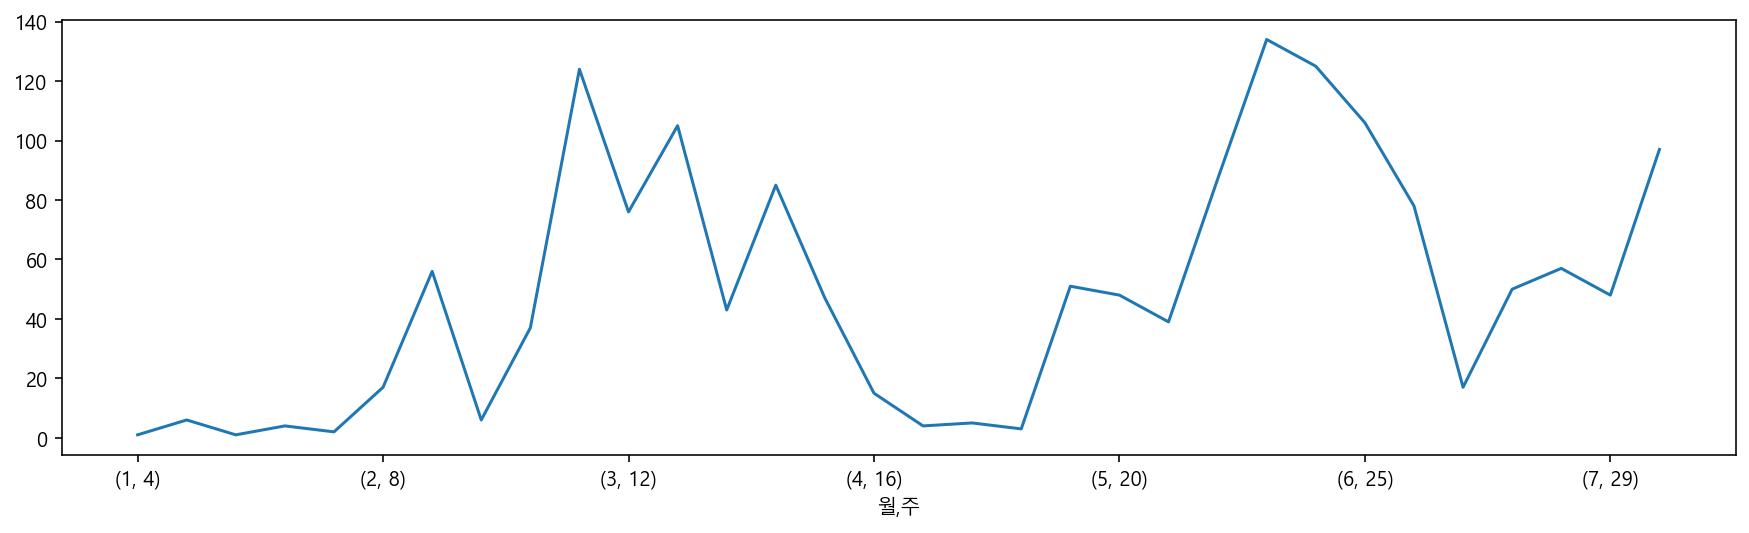

In [33]:
month_week_count = df.groupby(["월", "주"])["연번"].count()
month_week_count.plot(figsize = (15, 4))

## 모든 날짜를 행에 만들어 주기
* 확진자가 없는 날의 데이터도 만들어 줍니다.

In [34]:
# 첫 확진일 부터 마지막 확진일까지 가져옵니다.
# 데이터프레임의 첫번째 날짜는 first_day 에 마지막 날짜는 last_day 에 담습니다.

day_count = df["확진일자"].value_counts().sort_index()

In [35]:
first_day = day_count.index[0]
last_day = day_count.index[-1]
first_day, last_day

(Timestamp('2020-01-24 00:00:00'), Timestamp('2020-07-26 00:00:00'))

In [36]:
# pd.date_range 를 통해 시작하는 날짜부터 끝나는 날짜까지의 
# DatetimeIndex 를 만들고 days 라는 변수에 저장합니다.

days = pd.date_range(first_day, last_day)
days

DatetimeIndex(['2020-01-24', '2020-01-25', '2020-01-26', '2020-01-27',
               '2020-01-28', '2020-01-29', '2020-01-30', '2020-01-31',
               '2020-02-01', '2020-02-02',
               ...
               '2020-07-17', '2020-07-18', '2020-07-19', '2020-07-20',
               '2020-07-21', '2020-07-22', '2020-07-23', '2020-07-24',
               '2020-07-25', '2020-07-26'],
              dtype='datetime64[ns]', length=185, freq='D')

In [37]:
# days 변수의 값으로 "연월일" 이라는 컬럼이름을 갖는 데이터프레임을 만듭니다.

# days.to_frame()
# pd.DataFrame(days)
df_days = pd.DataFrame({"연월일": days})
df_days.head()

,연월일
0,2020-01-24
1,2020-01-25
2,2020-01-26
3,2020-01-27
4,2020-01-28


In [38]:
# 확진일자별로 빈도수 구하기

day_count = df["확진일자"].value_counts().sort_index()
day_count.head()

2020-01-24    1
2020-01-30    3
2020-01-31    3
2020-02-02    1
2020-02-05    2
Name: 확진일자, dtype: int64

In [39]:
# 확진일자별로 빈도수 구한 내용을 데이터프레임으로 변환하기

# day_count.to_frame()
df_day_count = day_count.reset_index()


In [40]:
# value_counts 결과의 컬럼명을 "확진수" 로 바꾸기


df_day_count.columns = ["확진일자", "확진수"]
df_day_count.head()

,확진일자,확진수
0,2020-01-24,1
1,2020-01-30,3
2,2020-01-31,3
3,2020-02-02,1
4,2020-02-05,2


### merge 를 통해 전체 확진일자 만들기
* 이미지 출처 및 Pandas 공식문서 보기 : [How to combine data from multiple tables? — pandas documentation](https://pandas.pydata.org/pandas-docs/stable/getting_started/intro_tutorials/08_combine_dataframes.html#join-tables-using-a-common-identifier)

<img src="https://pandas.pydata.org/pandas-docs/stable/_images/08_merge_left.svg">

In [41]:
# 확진자가 없는 날도 일자에 표현이 되도록 전체 일자와 확진 데이터를 merge 로 합쳐줍니다.

df_all_days = df_days.merge(df_day_count, 
                            left_on = "연월일", 
                            right_on = "확진일자", 
                            how = "left")
df_all_days = df_all_days[["연월일", "확진수"]]
df_all_days.head()

,연월일,확진수
0,2020-01-24,1.0
1,2020-01-25,NaN
2,2020-01-26,NaN
3,2020-01-27,NaN
4,2020-01-28,NaN


## 누적 확진자 수 구하기

In [42]:
type(np.nan)

float

In [43]:
# 확진수를 fillna를 통해 결측치를 0으로 채워주고 누적해서 더해줍니다.

df_all_days["확진수"] = df_all_days["확진수"].fillna(0).astype(int) # na값 0으로 넣고 숫자형으로 바꾸어주기
df_all_days.head(3)

,연월일,확진수
0,2020-01-24,1
1,2020-01-25,0
2,2020-01-26,0


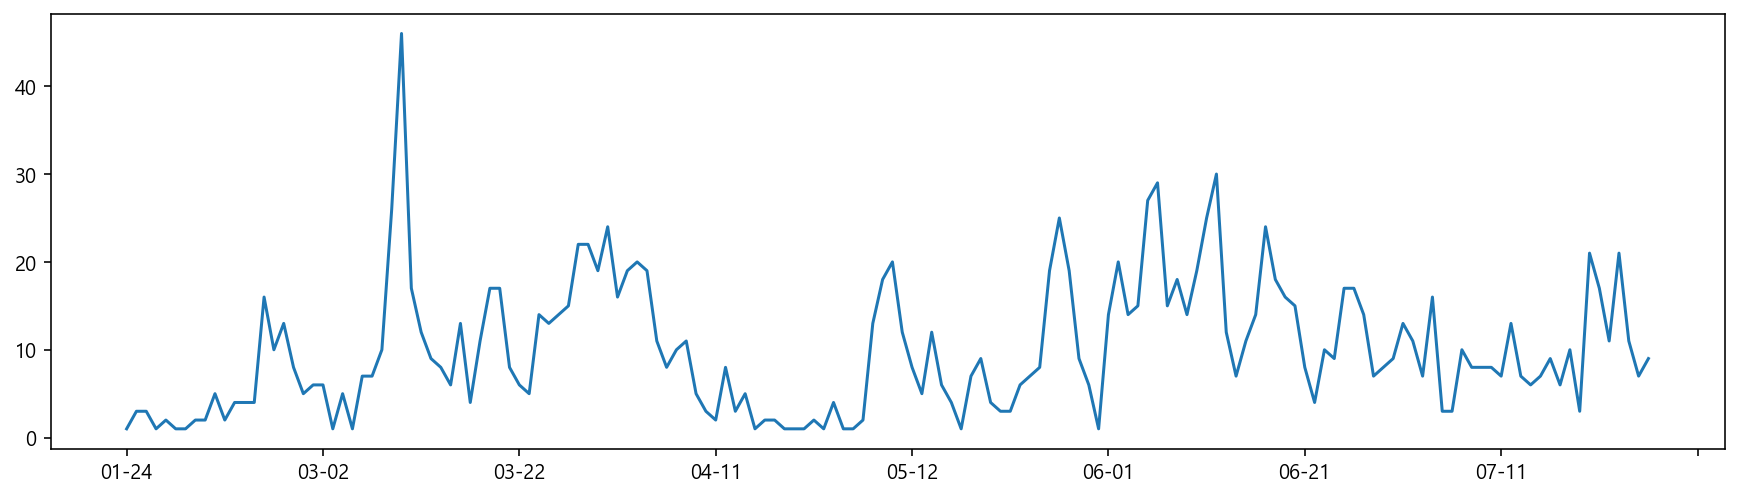

In [44]:
df["월일"] = df["확진일자"].astype(str).map(lambda x:x[-5:])
df["월일"].value_counts().sort_index().plot(figsize = (15, 4))

In [45]:
# 연도를 제외하고 월-일로 "일자" 컬럼 만들기

df_all_days["연월일"]

0     2020-01-24
1     2020-01-25
2     2020-01-26
3     2020-01-27
4     2020-01-28
         ...    
180   2020-07-22
181   2020-07-23
182   2020-07-24
183   2020-07-25
184   2020-07-26
Name: 연월일, Length: 185, dtype: datetime64[ns]

In [46]:
df_all_days["일자"] = df_all_days["연월일"].astype(str).map(lambda x:x[-5:])
df_all_days.head()

,연월일,확진수,일자
0,2020-01-24,1,01-24
1,2020-01-25,0,01-25
2,2020-01-26,0,01-26
3,2020-01-27,0,01-27
4,2020-01-28,0,01-28


In [47]:
# "확진수", "누적확진" 컬럼을 갖는 데이터프레임을 만듭니다.
df_all_days["누적확진"] = df_all_days["확진수"].cumsum()
df_all_days[["확진수", "누적확진"]].head(10)

,확진수,누적확진
0,1,1
1,0,1
2,0,1
3,0,1
4,0,1
5,0,1
6,3,4
7,3,7
8,0,7
9,1,8


In [48]:
df_all_days.tail()

,연월일,확진수,일자,누적확진
180,2020-07-22,11,07-22,1526
181,2020-07-23,21,07-23,1547
182,2020-07-24,11,07-24,1558
183,2020-07-25,7,07-25,1565
184,2020-07-26,9,07-26,1574


### 데이터프레임으로 그리기

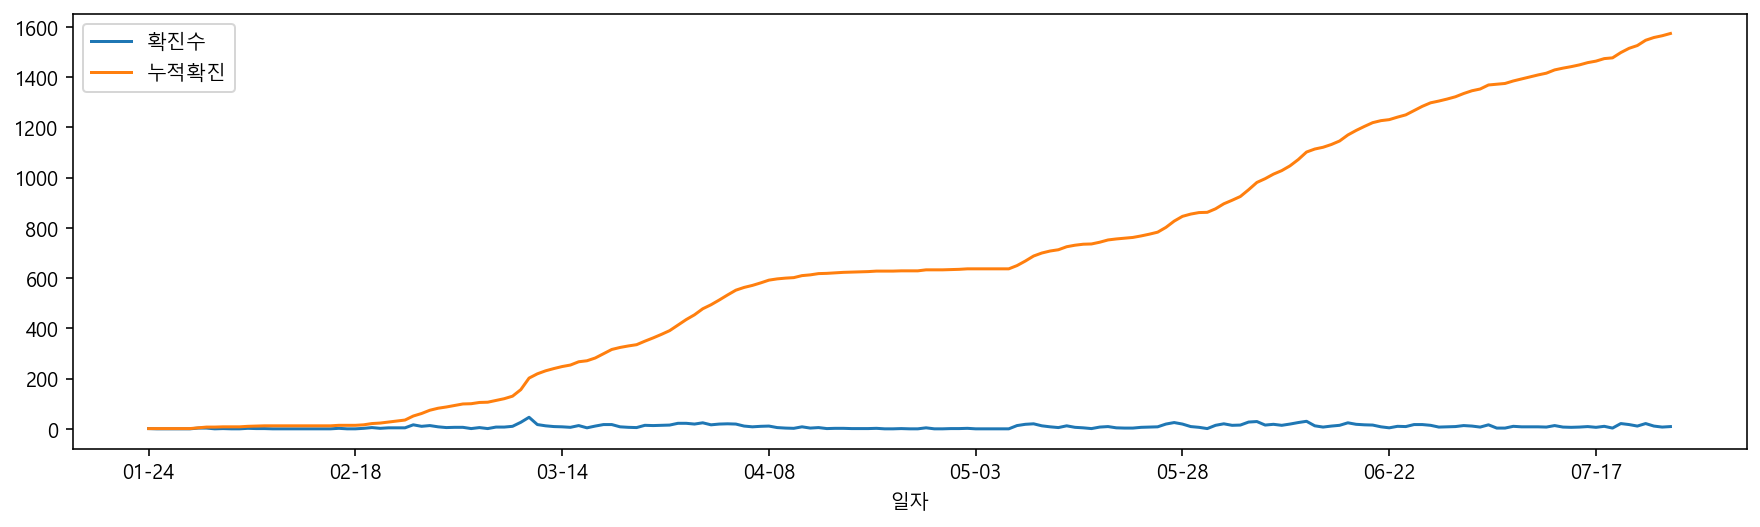

In [49]:
# 데이터프레임으로 확진수와 누적확진을 선그래프로 그립니다.

df_g = df_all_days[["일자", "확진수", "누적확진"]]
df_g = df_g.set_index("일자")
df_g.plot(figsize = (15, 4))

### 시리즈로 그리기

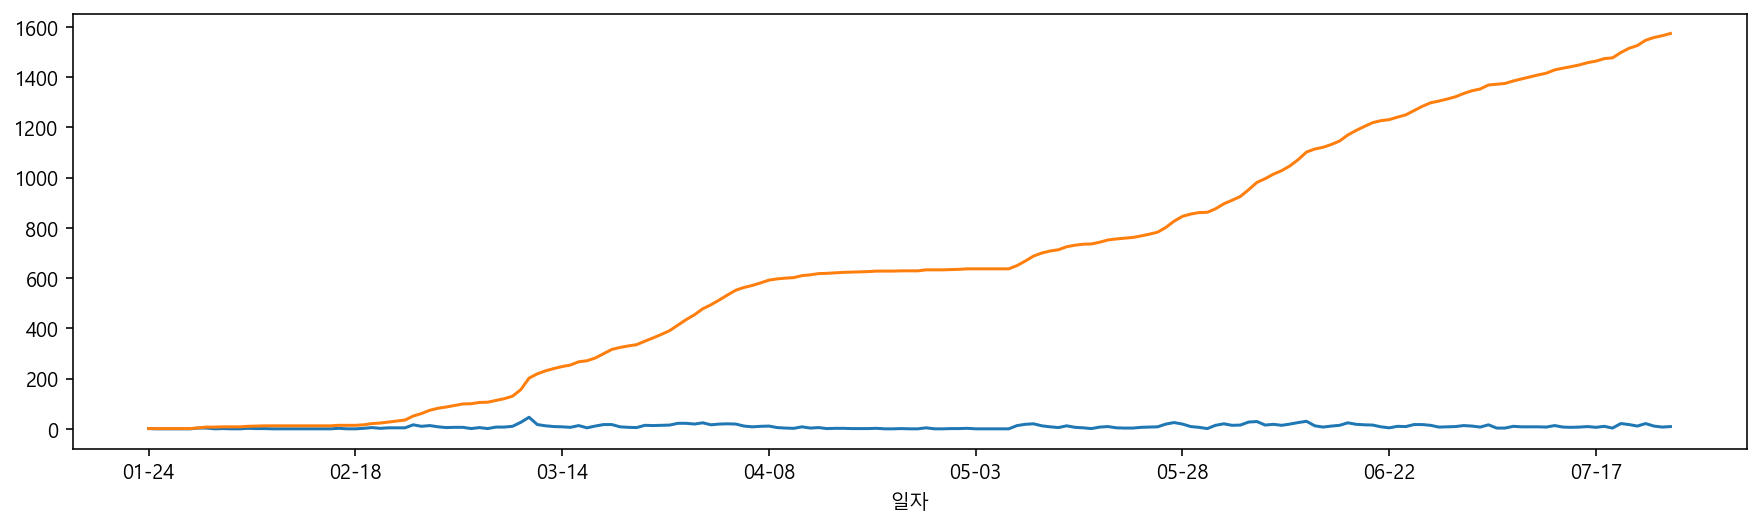

In [50]:
# 시리즈로 2개의 그래프 그리기

#df_all_days["확진수"].plot()
#df_all_days["누적확진"].plot(figsize = (15, 4))
df_g["확진수"].plot()
df_g["누적확진"].plot(figsize = (15, 4))

### 확진수만 따로 그리기

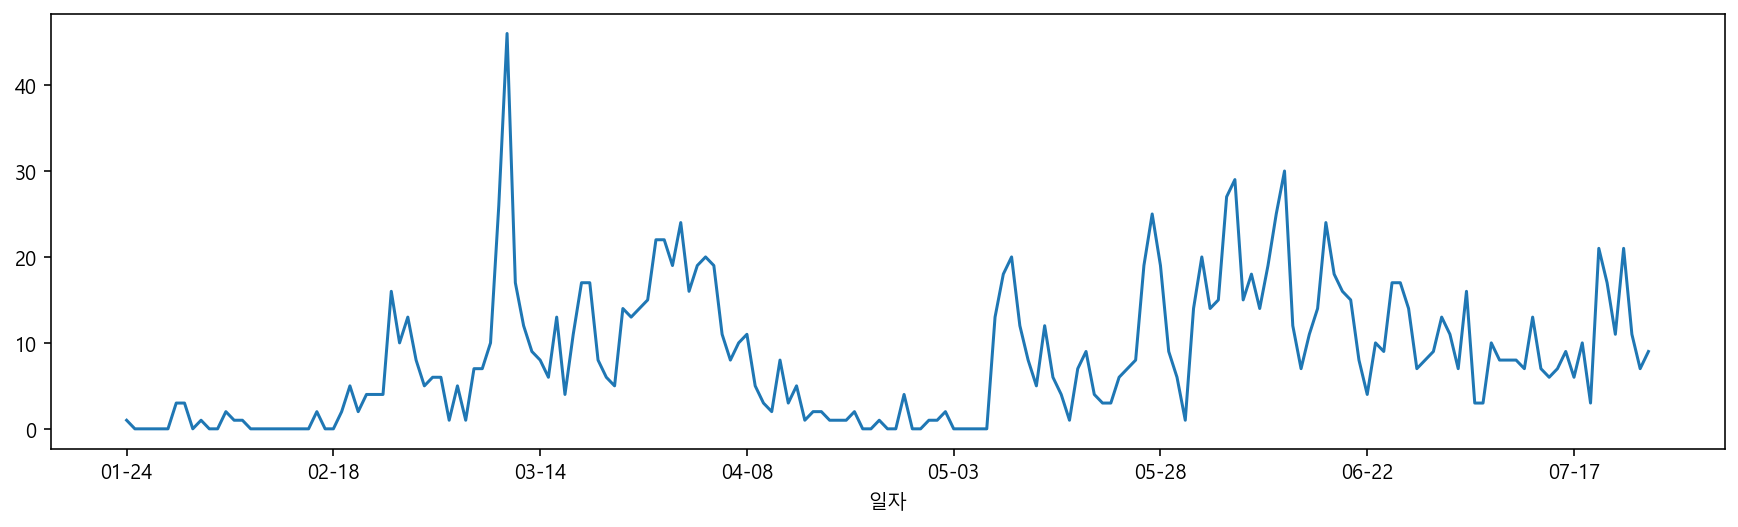

In [51]:
# 누적확진수와 확진수와 차이가 크면 제대로 보이지 않기 때문에 확진수만 그립니다.

df_g["확진수"].plot(figsize = (15, 4))

### 누적확진만 따로 그리기

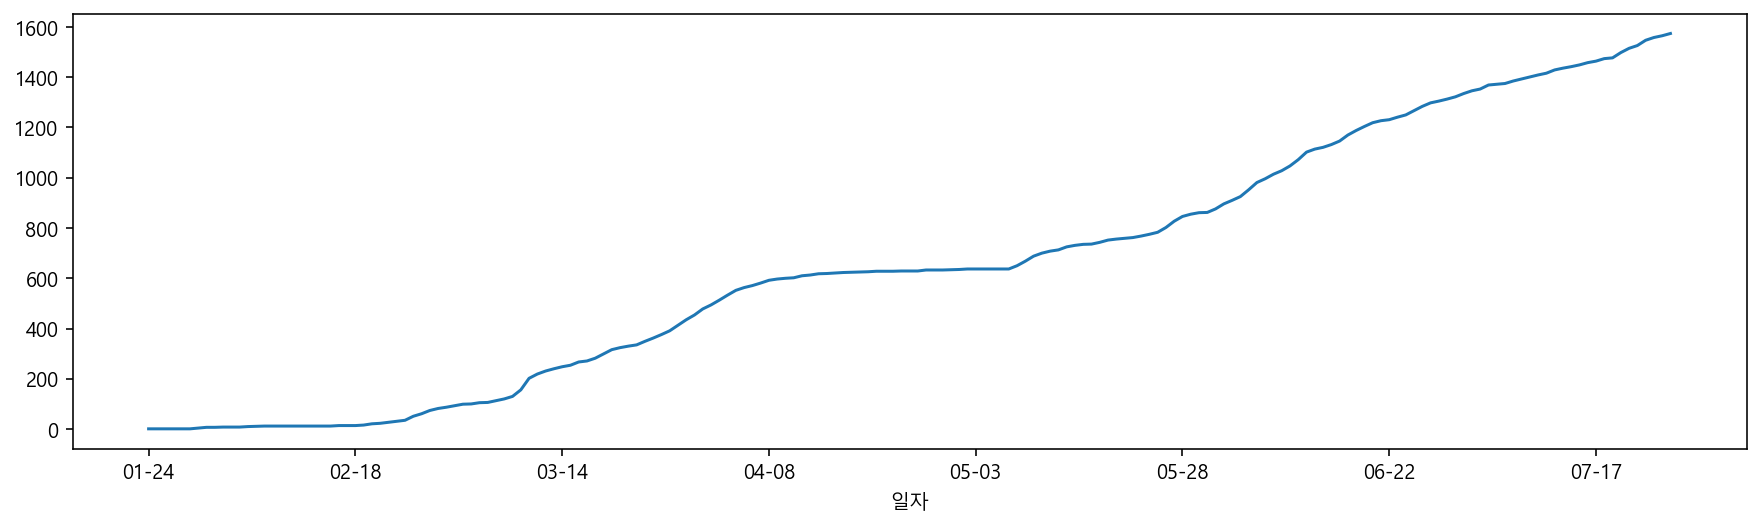

In [52]:
# 누적확진만 따로 그립니다.

df_g["누적확진"].plot(figsize = (15, 4))

### 로그스케일
* 차이가 너무 커서 그래프가 자세히 보이지 않을때 로그스케일로 표현하면 차이가 큰 값의 스케일을 조정해주게 됩니다.

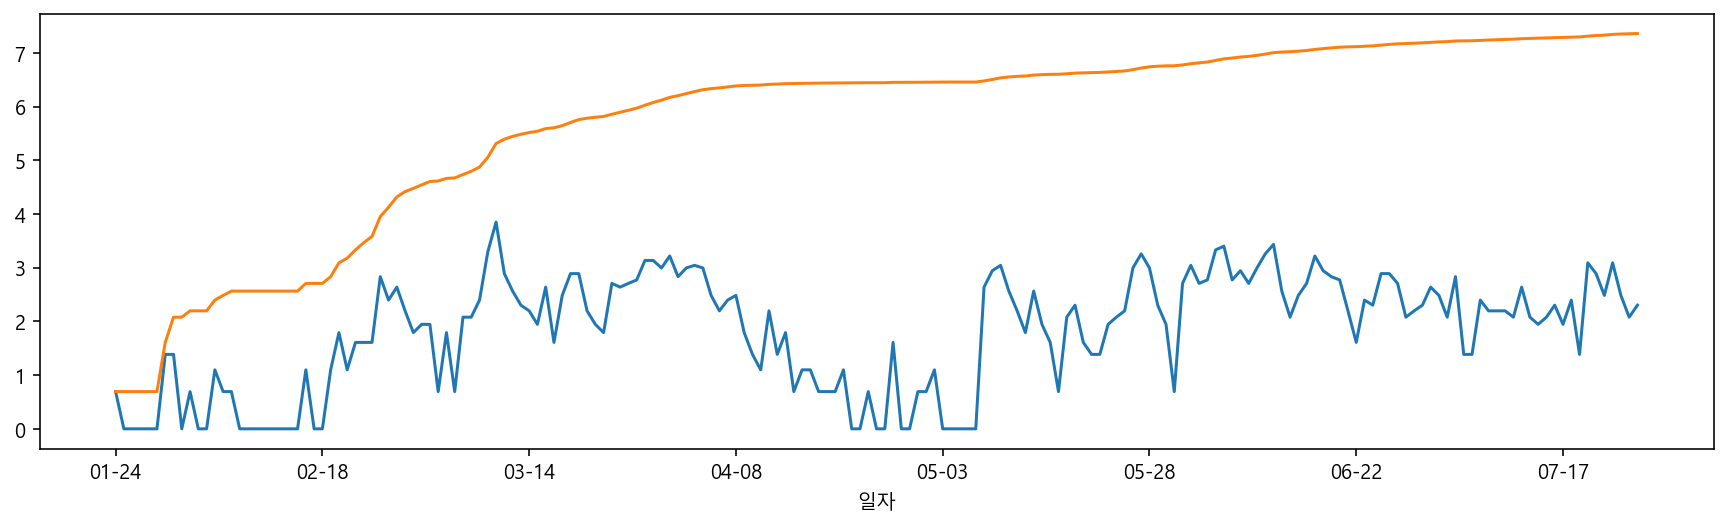

In [53]:
np.log(df_g["확진수"] + 1).plot(figsize = (15, 4))
# 1을 더해서 로그스케일을 구하면 0값에 수렴하는 마이너스 데이터를 0으로 대체 가능합니다.
np.log(df_g["누적확진"] + 1).plot(figsize = (15, 4))

### 확진월과 요일 구하기

In [130]:
df["요일"] = df["확진일자"].dt.dayofweek
df[["확진일자", "요일"]].head()

,확진일자,요일
0,2020-07-26,6
1,2020-07-26,6
2,2020-07-26,6
3,2020-07-26,6
4,2020-07-26,6


In [133]:
weekday_name = "월 화 수 목 금 토 일"
weekday_name = weekday_name.split()
weekday_name

['월', '화', '수', '목', '금', '토', '일']

In [134]:
weekday_name[0]

'월'

In [136]:
df["요일"].map(lambda x :x)

0       6
1       6
2       6
3       6
4       6
       ..
1569    4
1570    3
1571    3
1572    3
1573    4
Name: 요일, Length: 1574, dtype: int64

In [138]:
df["요일명"] = df["요일"].map(lambda x :weekday_name[x])

In [139]:
df[["확진일자", "요일", "요일명"]].head()

,확진일자,요일,요일명
0,2020-07-26,6,일
1,2020-07-26,6,일
2,2020-07-26,6,일
3,2020-07-26,6,일
4,2020-07-26,6,일


## 요일별 확진 수 

In [141]:
# 월별, 요일별 확진수를 groupby로 구하기

g = df.groupby(["월", "요일명"])["연번"].count()
g

월  요일명
1  금       4
   목       3
2  금      11
   목      19
   수      14
   월       4
   일       7
   토       9
   화      16
3  금      48
   목      44
   수      46
   월      69
   일      50
   토      45
   화      89
4  금      26
   목      27
   수      28
   월      16
   일      20
   토      22
   화      17
5  금      32
   목      34
   수      34
   월      27
   일      29
   토      36
   화      36
6  금      90
   목      75
   수      66
   월      55
   일      37
   토      70
   화      67
7  금      32
   목      49
   수      39
   월      31
   일      28
   토      40
   화      33
Name: 연번, dtype: int64

In [157]:
g = g.unstack()
g = g.fillna(0).astype(int)
g

요일명,금,목,수,월,일,토,화
월,,,,,,,
1,4,3,0,0,0,0,0
2,11,19,14,4,7,9,16
3,48,44,46,69,50,45,89
4,26,27,28,16,20,22,17
5,32,34,34,27,29,36,36
6,90,75,66,55,37,70,67
7,32,49,39,31,28,40,33


In [162]:
g = g[weekday_name]
g

요일명,월,화,수,목,금,토,일
월,,,,,,,
1,0,0,0,3,4,0,0
2,4,16,14,19,11,9,7
3,69,89,46,44,48,45,50
4,16,17,28,27,26,22,20
5,27,36,34,34,32,36,29
6,55,67,66,75,90,70,37
7,31,33,39,49,32,40,28


In [55]:
# 숫자로 표현된 요일을 문자로 바꿔주기 위해 split 을 통해 문자를 리스트로 변경합니다.
# dayofweek


In [56]:
# 컬럼의 이름을 한글요일명으로 변경해 줍니다.



In [167]:
# style.background_gradient 로 색상을 표현합니다.

g.style.background_gradient(cmap = "Greys") # 컬럼별 값의 크기에 따라 색깔 명암이 다릅니다.

요일명,월,화,수,목,금,토,일
월,,,,,,,
1,0,0,0,3,4,0,0
2,4,16,14,19,11,9,7
3,69,89,46,44,48,45,50
4,16,17,28,27,26,22,20
5,27,36,34,34,32,36,29
6,55,67,66,75,90,70,37
7,31,33,39,49,32,40,28


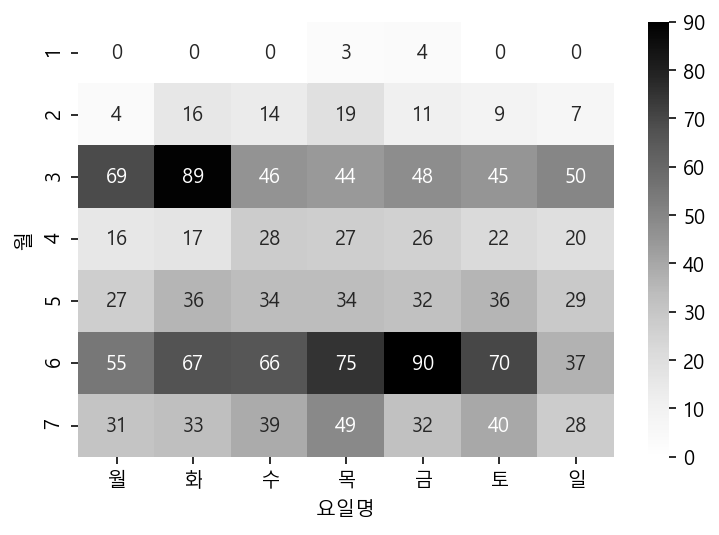

In [171]:
import seaborn as sns
sns.heatmap(g, cmap = "Greys", annot = True)  #전체 값중에 크고 작음에 따라 색깔 명암이 다름

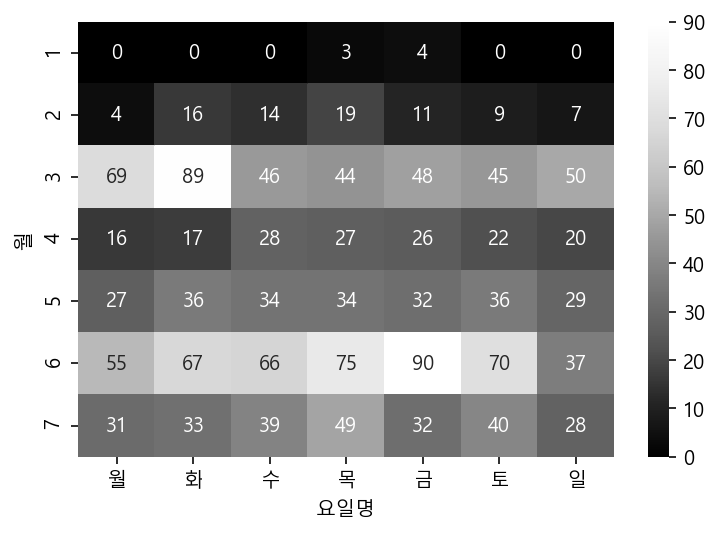

In [172]:
sns.heatmap(g, cmap = "Greys_r", annot = True) # 색깔 반대로

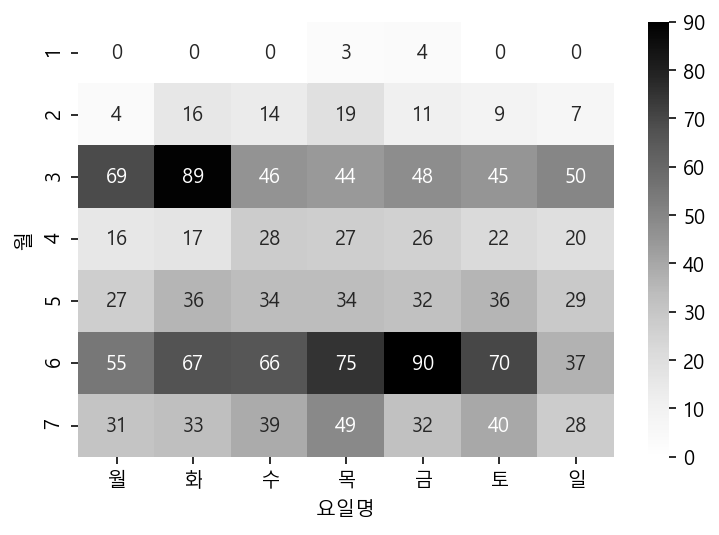

In [175]:
sns.heatmap(g, cmap = "Greys", annot = True, vmax = 90) # 상관계수 구할때 자주 쓰는 max값 지정

## 거주지별 확진자

In [178]:
# 거주지(구별) 확진자의 빈도수를 구하고 시각화 합니다.

gu_count = df["거주지"].value_counts()

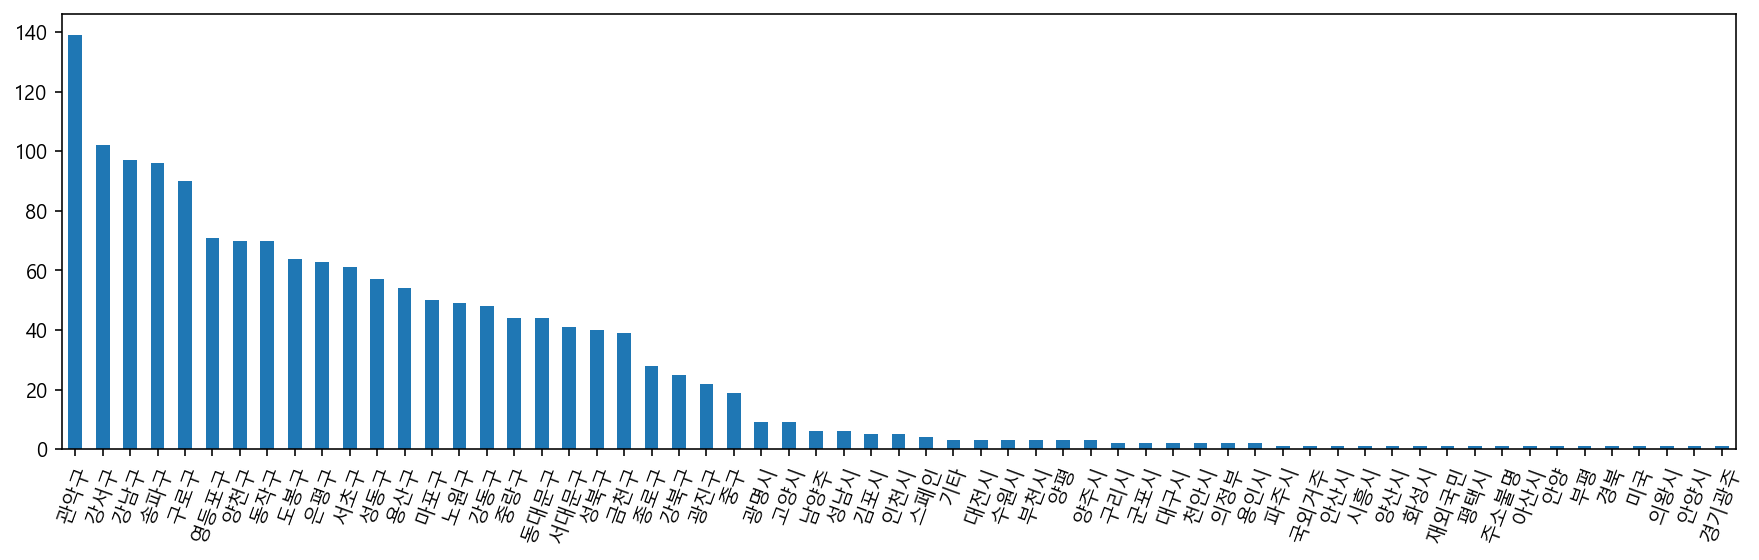

In [182]:
# 구별 확진자의 수를 시각화 합니다.

gu_count.plot.bar(figsize = (15, 4), rot = 70)

In [185]:
# 서울에서 확진판정을 받은 데이터이기 때문에 거주지가 서울이 아닐 수도 있습니다.
# 거주지 별로 서울시에 해당되는 데이터만 따로 가져옵니다.

seoul_gu = gu_count.head(25).index
seoul_gu

Index(['관악구', '강서구', '강남구', '송파구', '구로구', '영등포구', '양천구', '동작구', '도봉구', '은평구',
       '서초구', '성동구', '용산구', '마포구', '노원구', '강동구', '중랑구', '동대문구', '서대문구', '성북구',
       '금천구', '종로구', '강북구', '광진구', '중구'],
      dtype='object')

In [189]:
# 거주지가 서울이 아닌 지역을 따로 추출합니다.

df[df["거주지"].isin(seoul_gu)]

,연번,환자,확진일,거주지,여행력,접촉력,조치사항,확진일자,월,주,월일,요일,요일명
0,1574,14172,7.26.,송파구,-,송파구 확진자 접촉,서울의료원,2020-07-26,7,30,07-26,6,일
1,1573,14173,7.26.,강동구,미국,해외 접촉 추정,보라매병원,2020-07-26,7,30,07-26,6,일
2,1572,14165,7.26.,종로구,-,송파구 확진자 접촉,서울의료원,2020-07-26,7,30,07-26,6,일
3,1571,14175,7.26.,관악구,필리핀,해외 접촉 추정,보라매병원,2020-07-26,7,30,07-26,6,일
4,1570,14171,7.26.,용산구,이라크,해외 접촉 추정,서울의료원,2020-07-26,7,30,07-26,6,일
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1569,5,9,1.31.,성북구,-,#5 접촉,서울의료원(퇴원),2020-01-31,1,5,01-31,4,금
1570,4,7,1.30.,마포구,중국 우한시,해외 접촉,서울의료원(퇴원),2020-01-30,1,5,01-30,3,목
1571,3,6,1.30.,종로구,-,#3 접촉,서울대학교병원(퇴원),2020-01-30,1,5,01-30,3,목
1572,2,5,1.30.,중랑구,중국 우한시,해외 접촉,서울의료원(퇴원),2020-01-30,1,5,01-30,3,목


In [190]:
# 서울에 해당되지 않는것

df[~df["거주지"].isin(seoul_gu)]

,연번,환자,확진일,거주지,여행력,접촉력,조치사항,확진일자,월,주,월일,요일,요일명
12,1562,14143,7.25.,기타,이라크,해외 접촉 추정,생활치료센터,2020-07-25,7,30,07-25,5,토
13,1561,14140,7.25.,기타,-,송파구 확진자 접촉,보라매병원,2020-07-25,7,30,07-25,5,토
28,1546,13964,7.23.,성남시,-,송파구 교회관련,타시도 이관,2020-07-23,7,30,07-23,3,목
43,1531,13968,7.23.,경기광주,-,확인 중,타시도 이관,2020-07-23,7,30,07-23,3,목
154,1420,13447,7.12.,고양시,-,강남구 확진자 접촉,타시도 이관,2020-07-12,7,28,07-12,6,일
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1535,39,907,2.25.,평택시,-,확인중,타시도 이관(퇴원),2020-02-25,2,9,02-25,1,화
1539,35,847,2.25.,김포시,-,확인중,타시도 이관(퇴원),2020-02-25,2,9,02-25,1,화
1556,18,111,2.20.,대구시,-,대구 거주자,국립중앙의료원(퇴원),2020-02-20,2,8,02-20,3,목
1562,12,24,2.7.,아산시,우한교민,해외 접촉,국립중앙의료원(퇴원),2020-02-07,2,6,02-07,4,금


In [191]:
# 구를 전처리 하기 쉽게 컬럼으로 변환하기 위해 reset_index 로 변환합니다.

gu_count.loc[seoul_gu] # loc는 index 이름을 기준으로 가져옵니다.

관악구     139
강서구     102
강남구      97
송파구      96
구로구      90
영등포구     71
양천구      70
동작구      70
도봉구      64
은평구      63
서초구      61
성동구      57
용산구      54
마포구      50
노원구      49
강동구      48
중랑구      44
동대문구     44
서대문구     41
성북구      40
금천구      39
종로구      28
강북구      25
광진구      22
중구       19
Name: 거주지, dtype: int64

In [193]:
df["지역"] = df["거주지"]
df.head(1)

,연번,환자,확진일,거주지,여행력,접촉력,조치사항,확진일자,월,주,월일,요일,요일명,지역
0,1574,14172,7.26.,송파구,-,송파구 확진자 접촉,서울의료원,2020-07-26,7,30,07-26,6,일,송파구


In [194]:
# 서울에서 확진 받은 사람 중 서울 vs 타지역을 비교해 보기 위해
# "지역"이라는 새로운 컬럼을 만들어 서울지역이 아니라면 "타지역" 이라는 값을 넣어줍니다. 
# .loc[행인덱스]
# .loc[행, 열]
# .loc[조건, 열]


df.loc[~df["거주지"].isin(seoul_gu), "지역"] = "타지역"

In [196]:
# 위의 방법으로 할수도 있고 아래의 방법으로 만들수도 있습니다.
# 함수 혹은 익명함수를 사용하는 방법으로 "타지역" 값을 만들 수도 있습니다.


# 익명함수
df["지역"] = df["거주지"].map(lambda x: x if x in seoul_gu else "타지역")
df.tail(1)

,연번,환자,확진일,거주지,여행력,접촉력,조치사항,확진일자,월,주,월일,요일,요일명,지역
1573,1,2,1.24.,강서구,중국 우한시,해외 접촉,국립중앙의료원(퇴원),2020-01-24,1,4,01-24,4,금,강서구


In [198]:
# 이름이 있는 함수

def find_seoul_gu(x):
    if x in seoul_gu:
        return x
    else:
        return "타지역"

In [ ]:
df["지역"] = df["거주지"].map(find_seoul_gu)    # series에만 사용가능

In [ ]:
df["지역"] = df["거주지"].apply(find_seoul_gu)  # dataframe에도 가능

In [199]:
# "지역" 컬럼으로 확진자 빈도수를 구합니다.

seoul_gu_count = df["지역"].value_counts()

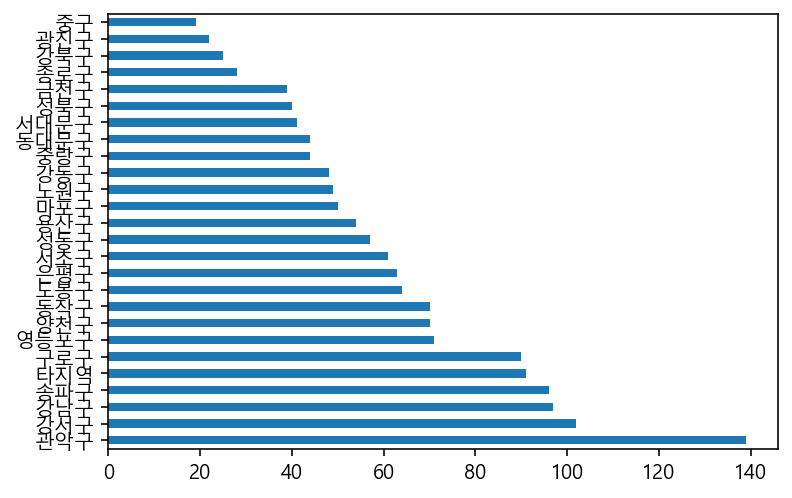

In [203]:
# 위에서 구한 빈도수를 막대그래프로 그립니다.

seoul_gu_count.plot.barh()

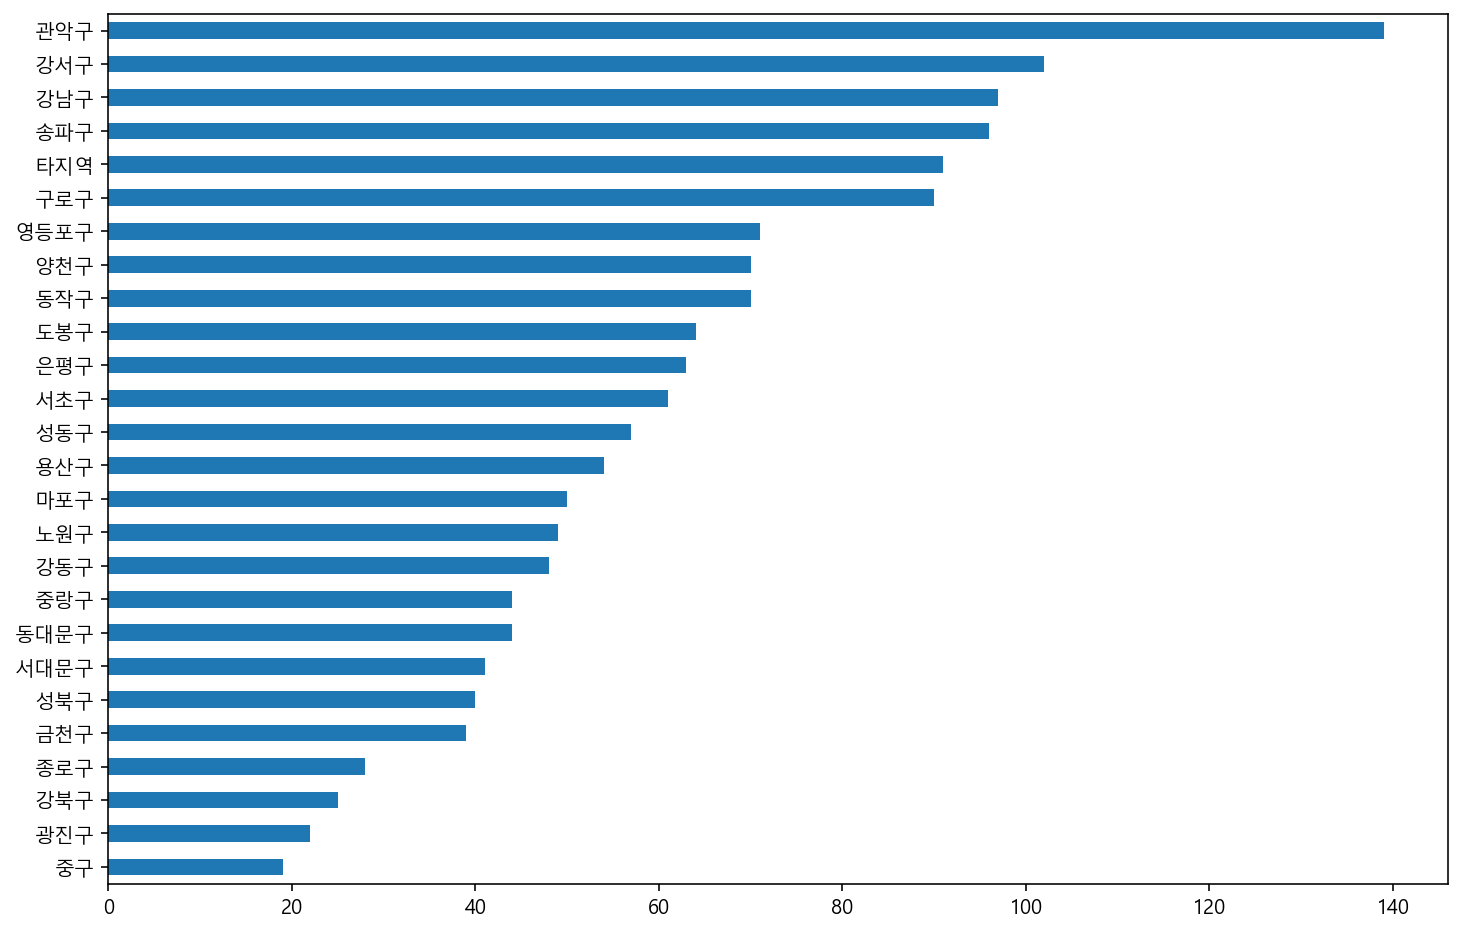

In [208]:
seoul_gu_count.sort_values().plot.barh(figsize = (12, 8))

## 접촉력

In [210]:
# 접촉력 빈도수를 구합니다.

df["접촉력"].value_counts().head(10)

해외 접촉 추정       314
이태원 클럽 관련      139
확인 중           136
리치웨이 관련        119
구로구 콜센터 관련      60
타시도 확진자 접촉      49
확인중             44
양천구 운동시설 관련     43
요양시설 관련         43
구로구 교회 관련       41
Name: 접촉력, dtype: int64

In [211]:
# 퍼센테이지로 보여집니다.

df["접촉력"].value_counts(normalize = True).head(10) * 100

해외 접촉 추정       19.949174
이태원 클럽 관련       8.831004
확인 중            8.640407
리치웨이 관련         7.560356
구로구 콜센터 관련      3.811944
타시도 확진자 접촉      3.113088
확인중             2.795426
양천구 운동시설 관련     2.731893
요양시설 관련         2.731893
구로구 교회 관련       2.604828
Name: 접촉력, dtype: float64

In [212]:
# 접촉력의 unique 값만 구합니다.

df["접촉력"].unique()

array(['송파구 확진자 접촉', '해외 접촉 추정', '확인 중', '강서구 요양시설관련', '은평구 확진자 접촉',
       '송파구 교회관련', '관악구 사무실 관련', '강남구 사무실 K빌딩', '강남구 사무실 관련', '종로구 지인모임',
       '동작구 확진자 접촉', '타시도 확진자 접촉', '강남역삼동 금융회사', '중구 확진자 접촉',
       '강남구 확진자 접촉', '확인중', '강서구 요양시설 관련', '성북구 확진자 접촉', '서초구 확진자 접촉',
       '성동구 확진자 접촉', '영등포구 확진자 접촉', '강남구 이동통신 종사자', '강남구 역삼동 모임',
       '양천구 확진자 접촉', '강서구 확진자 접촉', '용산구 확진자 접촉', '광진구 확진자 접촉', '왕성교회 관련',
       '중랑구 일가족 관련', '관악구 확진자 접촉', '종로구 확진자 접촉', '관악구 일가족 관련',
       '대전 꿈꾸는 교회', '리치웨이 관련', '구로구 확진자 접촉', '금천구 확진자 접촉', '요양시설 관련',
       '강동구 확진자 접촉', '시청역 관련', '대자연코리아', '의왕 물류센터 관련', '금천구 도정기 회사 관련',
       '양천구 운동시설 관련', '대전 다단계 관련', '오렌지라이프 관련', '수도권 개척교회 관련',
       '타시도 확진자 접촉자', '연아나뉴스클래스 관련', '한국대학생선교회 관련', '해외접촉 추정',
       'kb 생명보험 관련', '부천시 쿠팡 관련', '이태원 클럽 관련', '용인 형제 관련', '삼성화재 관련',
       '서초구 가족 관련', '안양군포 목회자 관련', '서초구 가족관련', '영등포 학원 관련', '강남구 동인교회 관련',
       '원어성경연구회 관련', '#11196 접촉', '삼성서울병원 관련', '#10054 접촉', '#9800 접촉',
       '#10044 접촉', '#9641 접촉', '구로구

In [220]:
# "확인" 이 들어가는 접촉력만 찾습니다.

df.loc[df["접촉력"].str.contains("확인"), "접촉력"].unique()

array(['확인 중', '확인중'], dtype=object)

In [221]:
# '확인 중', '확인중' => "확인 중" 으로 변경합니다.

df.loc[df["접촉력"].str.contains("확인"), "접촉력"] = "확인 중"

In [222]:
# "확인" 이 들어가는 접촉력만 찾습니다.

df.loc[df["접촉력"].str.contains("확인"), "접촉력"].unique()

array(['확인 중'], dtype=object)

In [224]:
# 접촉력 빈도수를 시각화 합니다.

contact_count = df["접촉력"].value_counts()

In [227]:
df["접촉력"].value_counts(normalize = True).head(15) * 100

해외 접촉 추정       19.949174
확인 중           11.435832
이태원 클럽 관련       8.831004
리치웨이 관련         7.560356
구로구 콜센터 관련      3.811944
타시도 확진자 접촉      3.113088
양천구 운동시설 관련     2.731893
요양시설 관련         2.731893
구로구 교회 관련       2.604828
수도권 개척교회 관련     2.350699
콜센터직원 접촉        2.350699
강남구 사무실 관련      2.096569
왕성교회 관련         1.905972
동대문구 관련         1.778907
부천시 쿠팡 관련       1.524778
Name: 접촉력, dtype: float64

In [225]:
# 상위 15개만 구합니다.

contact_count.head(15)

해외 접촉 추정       314
확인 중           180
이태원 클럽 관련      139
리치웨이 관련        119
구로구 콜센터 관련      60
타시도 확진자 접촉      49
양천구 운동시설 관련     43
요양시설 관련         43
구로구 교회 관련       41
수도권 개척교회 관련     37
콜센터직원 접촉        37
강남구 사무실 관련      33
왕성교회 관련         30
동대문구 관련         28
부천시 쿠팡 관련       24
Name: 접촉력, dtype: int64

In [228]:
# 접촉력 빈도수가 높은 목록에 대한 index 값을 구해옵니다.

top_contact = contact_count.head(15).index
top_contact

Index(['해외 접촉 추정', '확인 중', '이태원 클럽 관련', '리치웨이 관련', '구로구 콜센터 관련', '타시도 확진자 접촉',
       '양천구 운동시설 관련', '요양시설 관련', '구로구 교회 관련', '수도권 개척교회 관련', '콜센터직원 접촉',
       '강남구 사무실 관련', '왕성교회 관련', '동대문구 관련', '부천시 쿠팡 관련'],
      dtype='object')

In [232]:
# 위에서 구한 top_contact 에 해당되는 데이터만 isin 으로 가져옵니다.

df_top_contact = df.loc[df["접촉력"].isin(top_contact)]

In [250]:
# 접촉력, 월별 빈도수를 groupby 로 구합니다.
contact_group = df_top_contact.groupby(["접촉력", "월"])["연번"].count().unstack()

In [259]:
contact_group = contact_group.fillna(0).astype(int)

contact_group.sort_index(ascending = False)
contact_group.sort_values(by = [2, 3], ascending = False)
# contact_group.style.background_gradient()

월,2,3,4,5,6,7
접촉력,,,,,,
확인 중,11,29,9,12,75,44
타시도 확진자 접촉,5,17,4,2,6,15
해외 접촉 추정,1,120,112,24,23,34
구로구 콜센터 관련,0,60,0,0,0,0
콜센터직원 접촉,0,36,1,0,0,0
구로구 교회 관련,0,35,6,0,0,0
동대문구 관련,0,28,0,0,0,0
강남구 사무실 관련,0,0,0,0,2,31
리치웨이 관련,0,0,0,0,119,0


### 이태원 클럽 관련
* 이태원 클럽 전파는 5월에 시작되었으나 6월에도 확진자가 있습니다.
* 6월에 이태원 클럽관련 확진자를 찾아봅니다.

In [260]:
contact_group.loc["이태원 클럽 관련"]

월
2      0
3      0
4      0
5    133
6      6
7      0
Name: 이태원 클럽 관련, dtype: int32

In [261]:
df[df["접촉력"] == "이태원 클럽 관련"]

,연번,환자,확진일,거주지,여행력,접촉력,조치사항,확진일자,월,주,월일,요일,요일명,지역
594,980,11786,6.06.,성동구,-,이태원 클럽 관련,서울의료원(퇴원),2020-06-06,6,23,06-06,5,토,성동구
609,965,11741,6.06.,은평구,-,이태원 클럽 관련,보라매병원(퇴원),2020-06-06,6,23,06-06,5,토,은평구
618,956,11730,6.06.,성동구,-,이태원 클럽 관련,서울대병원(퇴원),2020-06-06,6,23,06-06,5,토,성동구
625,949,11775,6.05.,은평구,-,이태원 클럽 관련,국립중앙의료원(퇴원),2020-06-05,6,23,06-05,4,금,은평구
640,934,11687,6.05.,성동구,-,이태원 클럽 관련,보라매병원(퇴원),2020-06-05,6,23,06-05,4,금,성동구
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
932,642,10840,5.08.,용산구,-,이태원 클럽 관련,국군수도통합병원(퇴원),2020-05-08,5,19,05-08,4,금,용산구
933,641,10831,5.08.,용산구,-,이태원 클럽 관련,순천향서울병원(퇴원),2020-05-08,5,19,05-08,4,금,용산구
934,640,10839,5.08.,용산구,-,이태원 클럽 관련,순천향서울병원(퇴원),2020-05-08,5,19,05-08,4,금,용산구
935,639,10832,5.08.,용산구,-,이태원 클럽 관련,순천향서울병원(퇴원),2020-05-08,5,19,05-08,4,금,용산구


### 감염경로 불명

In [285]:
# "접촉력" 이 "확인 중"인 데이터만 구합니다.

df_unknown = df[df["접촉력"] == "확인 중"].copy() ## 파생 데이터를 만들려면 copy()함수를 써서 기존데이터 손실방지합니다.
df_unknown.head()

,연번,환자,확진일,거주지,여행력,접촉력,조치사항,확진일자,월,주,월일,요일,요일명,지역
5,1569,14161,7.26.,중구,-,확인 중,보라매병원,2020-07-26,7,30,07-26,6,일,중구
11,1563,14147,7.25.,송파구,-,확인 중,서울의료원,2020-07-25,7,30,07-25,5,토,송파구
14,1560,14142,7.25.,동대문구,-,확인 중,서울의료원,2020-07-25,7,30,07-25,5,토,동대문구
23,1551,14065,7.24.,은평구,-,확인 중,서북병원,2020-07-24,7,30,07-24,4,금,은평구
34,1540,13976,7.23.,송파구,-,확인 중,서남병원,2020-07-23,7,30,07-23,3,목,송파구


In [286]:
# 감염경로 불명이 어느정도인지 봅니다.
df_unknown.shape

(180, 14)

In [287]:
# 전체 확진수를 value_counts 로 구하고 데이터프레임 형태로 만듭니다.
# all_weekly_case

all_weekly_case = df["주"].value_counts()
all_weekly_case.head()

23    134
14    128
24    125
11    124
25    106
Name: 주, dtype: int64

In [288]:
# 전체 확진수를 value_counts 로 구하고 데이터프레임 형태로 만듭니다.
# unknown_weekly_case

unknown_weekly_case = df_unknown["주"].value_counts()
unknown_weekly_case.head()

24    25
23    18
30    16
25    16
27    13
Name: 주, dtype: int64

In [289]:
# all_weekly_case 와 unknown_weekly_case 를 비교해 봅니다.

all_unknown = pd.DataFrame({"주별 확진" : all_weekly_case, 
                            "감염경로 불명 확진" : unknown_weekly_case})
all_unknown = all_unknown.fillna(0)

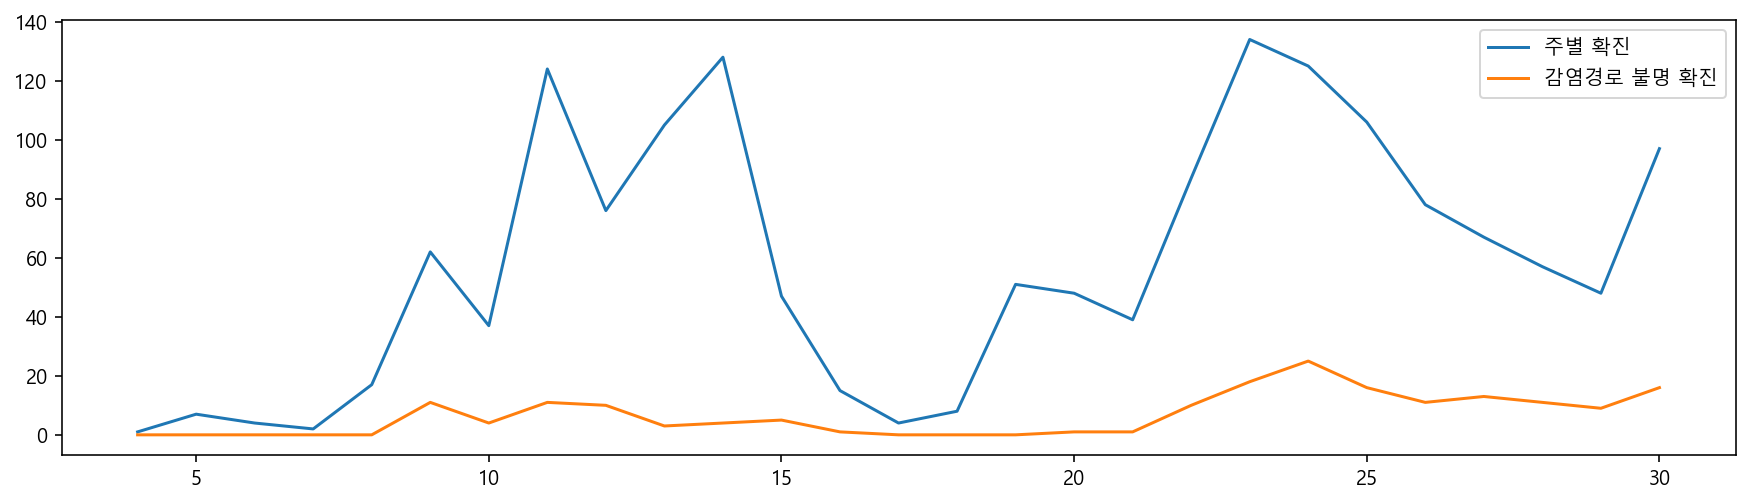

In [290]:
# 위에서 구한 결과를 시각화 합니다.

all_unknown.plot(figsize = (15, 4))

In [292]:
# 감염경로 "확인 중"의 주별 비율

all_unknown["확인중 비율"] = (all_unknown["감염경로 불명 확진"] / all_unknown["주별 확진"]) * 100
all_unknown
all_unknown.sort_values(["확인중 비율"], ascending = False).head(10)

,주별 확진,감염경로 불명 확진,확인중 비율
24,125,25.0,20.000000
27,67,13.0,19.402985
28,57,11.0,19.298246
29,48,9.0,18.750000
9,62,11.0,17.741935
30,97,16.0,16.494845
25,106,16.0,15.094340
26,78,11.0,14.102564
23,134,18.0,13.432836
12,76,10.0,13.157895


## 가장 많은 전파가 일어난 번호
* [정규 표현식 - 위키백과, 우리 모두의 백과사전](https://ko.wikipedia.org/wiki/%EC%A0%95%EA%B7%9C_%ED%91%9C%ED%98%84%EC%8B%9D)


* 파이썬 공식문서 정규표현식 참고하기 : 
    * https://docs.python.org/3.8/library/re.html#re.sub
    
    
* 문자열 바꾸기 : re.sub("규칙", "패턴", "데이터")
    * https://docs.python.org/3.8/library/re.html#text-munging


* 정규표현식 문자열 패턴
    * https://docs.python.org/3.8/howto/regex.html#matching-characters

    
    
* [    ] : 일치시킬 문자 세트의 패턴
* [가나다] : 가 or 나 or 다 중에 하나를 포함하고 있는지
* [가-힣] : 한글 가부터 힣까의 문자 중 하나를 포함하고 있는지
* [0-9] : 0~9까지의 숫자 중 하나를 포함하고 있는지
* [^0-9] : 숫자를 포함하고 있지 않음
* [^가-힣] : 한글이 포함되어 있지 않음
* [가-힣+] : 한글이 하나 이상 포함되는지


In [295]:
import re
# 정규표현식 라이브러리를 불러옵니다.
# 숫자외의 데이터는 제거하는 정규표현식
# #7265 접촉(추정)

# re.sub(문자의 패턴, 치환할 문자, 해당문자)
re.sub("[0-9]", "", "7265 접촉(추정)")

' 접촉(추정)'

In [296]:
re.sub("[^0-9]", "", "7265 접촉(추정)")

'7265'

In [299]:
# 함수를 통해 숫자외의 문자를 제거하는 get_number 함수를 만듭니다.

def get_number(x):
    return re.sub("[^0-9]", "", x)

get_number("7265 접촉(추정)")

'7265'

In [303]:
# 함수를 map을 통해 접촉번호를 구합니다.

df["접촉번호"] = df["접촉력"].map(get_number)
contact_number = df["접촉번호"].value_counts()

In [309]:
# 접촉번호가 없는 0번 행은 drop 으로 삭제합니다.
# 한번 drop 한 셀을 다시 drop 하면 이미 삭제를 했는데 다시 삭제하려 하기 때문에 KeyError 가 납니다. 
# 다시 실행했을 때 KeyError 가 발생하는 것이 정상입니다.

df_contact_number = contact_number.reset_index()
df_contact_number.columns = ["접촉번호", "접촉수"]
df_contact_number = df_contact_number.drop(0)
df_contact_number.head()

,접촉번호,접촉수
1,9734,4
2,6,4
3,8271,3
4,8791,3
5,780,3


In [310]:
# 상위 10개의 접촉번호를 구해서 top_contact_no 변수에 할당하고 재사용합니다.

df_contact_number["접촉수"].describe()

count    61.000000
mean      1.393443
std       0.758918
min       1.000000
25%       1.000000
50%       1.000000
75%       2.000000
max       4.000000
Name: 접촉수, dtype: float64

In [89]:
# contact의 환자번호와 df의 접촉번호를 merge 합니다.



## 조치사항

In [90]:
# 조치사항에 대한 빈도수를 세어봅니다.
# value_counts 는 Series 에만 사용할 수 있습니다.
# 단일 변수의 빈도수를 세는데 사용합니다.



## 퇴원, 사망여부

In [91]:
# 조치사항 컬럼을 통해 퇴원과 사망 컬럼을 새로 만듭니다.
# 또, 어느 병원에 조치되었는지도 병원 컬럼을 만들어서 담습니다.



In [92]:
# 데이터 수집 시점에서 퇴원하지 못한 환자수



In [93]:
# 퇴원여부 빈도수에 대한 비율을 구합니다.



In [94]:
# 사망여부에 따른 빈도수를 구합니다.



In [95]:
# 사망 여부에 따른 빈도수의 비율을 구합니다.


* 데이터 수집 시점 기준 현재까지 입원해 있는 확진자 중 가장 오래 입원해 있는 확진자

In [96]:
# 데이터 수집 시점 기준 현재까지 입원해 있는 확진자 중 가장 오래 입원해 있는 확진자



## 병원

In [97]:
# describe 로 요약을 합니다.
# count : 빈도수
# unique : 병원수
# top : 가장 많은 빈도로 등장하는 텍스트
# freq : 가장 많은 빈도의 횟수



In [98]:
# 병원의 빈도수를 구합니다.



In [99]:
# 병원별 빈도수를 막대그래프로 표현합니다.



In [100]:
# 입원환자가 많은 병원을 구합니다.



### iloc 로 일부 데이터만 보기

In [101]:
# 전체 데이터를 보기에 너무 많을 수 있기 때문에 iloc 를 사용해서 일부 데이터만 봅니다.



### loc로 일부 데이터만 보기
* iloc 와 loc의 차이점을 비교해 보세요.

### pandas style 적용하기

In [102]:
# 전체 병원이 너무 많기 때문에 환자가 많은 병원만 따로 봅니다.


## 여행력

In [103]:
# "해외" 라는 컬럼을 만들어 데이터를 전처리 합니다.
# "여행력"에 "-" 문자가 들어가 있으면 결측치로 처리합니다.
# df["해외"]


In [104]:
# describe 로 요약을 합니다.
# count : 빈도수
# unique : 병원수
# top : 가장 많은 빈도로 등장하는 텍스트
# freq : 가장 많은 빈도의 횟수


### 여행력이 있는 데이터만 가져와서 서브셋 만들기

In [105]:
# "해외" 컬럼의 값이 결측치가 아닌 데이터만 가져와서 
# df_oversea 라는 새로운 데이터프레임에 담습니다.


In [106]:
# 중복되는 지역명이 있는지 확인합니다.


### 텍스트 데이터 다루기
[Working with text data — pandas documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/text.html#testing-for-strings-that-match-or-contain-a-pattern)

In [107]:
# 유럽 지역을 방문했다면 유럽이라고 바꿔주기 위해 국가명을 str.contains 로 검색하기 위한 형태로 만듭니다.
europe = "체코, 헝가리, 오스트리아, 이탈리아, 프랑스, 모로코, 독일, 스페인, 영국, 폴란드, 터키, 아일랜드"


In [108]:
# 남미 지역에 해당되는 국가명을 str.contains 로 검색하기 위한 형태로 만듭니다.
south_america = "브라질, 아르헨티아, 칠레, 볼리비아, 멕시코, 페루"


In [109]:
# 중복되는 국가나 지역을 특정 텍스트로 변경해서 그룹화 해서 빈도수를 세어볼 예정입니다.
# .str.contains 와 .loc 를 사용해서 전처리 합니다.



In [110]:
# describe 로 요약을 합니다.
# count : 빈도수
# unique : 병원수
# top : 가장 많은 빈도로 등장하는 텍스트
# freq : 가장 많은 빈도의 횟수


In [111]:
# 확진일자, 해외 별 카운트 수를 구합니다.



In [112]:
# 위에서 구한 값을 바탕으로 지역별 누적 확진수를 구합니다.



In [113]:
# 위에서 구한 값을 reset_index() 를 통해 데이터프레임으로 변경하고 "연번" 컬럼을 "확진자수"로 변경합니다.



In [114]:
# "해외" 컬럼의 빈도수를 구합니다.


In [115]:
# 위에서 구한 빈도수를 시각화 합니다.


In [116]:
# "해외유입 구별 확진자" 시각화 하기



### 전체확진수와 해외유입 확진수 비교

In [117]:
# all_count_gu 변수에 전체 지역의 확진자수 구하기


In [118]:
# 데이터프레임으로 변환하고 컬럼명 변경하기



In [119]:
# 해외유입확진수 구하기



### merge 를 통해 전체 확진수와 해외유입확진수 비교하기
* 이미지 출처 및 Pandas 공식문서 보기 : [How to combine data from multiple tables? — pandas documentation](https://pandas.pydata.org/pandas-docs/stable/getting_started/intro_tutorials/08_combine_dataframes.html#join-tables-using-a-common-identifier)

<img src="https://pandas.pydata.org/pandas-docs/stable/_images/08_merge_left.svg">

In [120]:
# merge 로 합쳐서 전체확진수와 해외유입확진수 비교해 보기



In [121]:
# 시각화 하기



In [122]:
# df_all_oversea_case["해외유입비율"] 구하기



### 해외유입 확진자 중 퇴원 여부

In [123]:
# oversea_finish_count 해외유입 확진자 중 퇴원 여부 구하기



### 월별 해외 확진자 수

### 구와 월별 해외 확진자 수
* groupby, crosstab, pivot_table 로 같은 결과의 테이블이 나오도록 구합니다.
#### groupby 로 빈도수 구하기

#### crosstab 으로 빈도수 구하기

#### pivot_table 로 빈도수 구하기

### 해외유입이 많은 지역

In [124]:
# 해외유입이 많은 상위 10개 지역을 구합니다.
# top_oversea_gu


In [125]:
# 시각화 하기



### 구별 해외유입 국가 분석하기
#### groupby 로 구하기

#### pivot table 로 구하기
* groupby 로 구한 결과와 같은 결과가 나오게 구합니다.

#### 일부 구만 따로 보기
* 전체는 너무 많기 때문에 특정 구만 따로 봅니다.

In [126]:
# 강남 3구의 입국자는 해외 어느 지역에서 입국했나?



In [127]:
# top_oversea_gu 에 따른 확진수 보기


### 최근 데이터를 불러와 실습해 보기
* 이 실습을 진행하고 계신 여러분들은 이 시점보다 미래에 있겠죠?
* 같은 내용의 실습을 최근 데이터로 해보세요!